# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
from sklearn.mixture import GaussianMixture         
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score 


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [23]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Let's encapsulate the key insights from the mean values of these features:

The average balance across customers stands at approximately $1564.47, reflecting the typical amount held in their accounts

Customers tend to update their balance frequency, on average, around 88% of the tie.

The mean purchases made by customers amount to about $1003.20, indicating their average spending behaior.

On average, customers make one-off purchases totaling around $592.44, showing occasional substantial purchase beavior.

Installment-based purchases, averaging around $411.07, represent a significant portion of customer pending.

Customers utilize cash advances averaging $978.87, indicating occasional use of this financil service.

The mean purchase frequency among customers is approximately 49%, showcasing their regularity in makig purchases.

For one-off purchases, customers have an average frequency of around 20%, demonstrating sporadic large-vlue purchases.

Installment purchases have an average frequency of about 36%, indicating a consistent pattern of speading payments.

The mean cash advance frequency stands at approximately 14%, denoting occasional utilizatin of this service.

Customers typically engage in around 3.25 cash advance transactions, on average, portraying the frequencyof such transactions.

On average, customers engage in around 14.71 purchase transactions, signifying their verall buying activity.

The mean credit limit assigned to customers is approximately $4494.45, setting their mximum spending threshold.

Customers make average payments of $1733.14, reflecting ther typical payment behavior.

The mean minimum payments by customers amount to approximately $864.21, showcasing their usua minimum payment obligations.

Customers tend to pay approximately 15% of their full credit balance on average, reflecting their tedency towards partial payments.

The average tenure of customers with the bank is around 11.52, indicating the typical duration of their lationship with the institution.



In [7]:
# Check for null values in each column
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)


Null values in each column:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [8]:
# Check data types of each column
data_types = df.dtypes
print("Data types of each column:\n", data_types)


Data types of each column:
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [12]:
dff=df

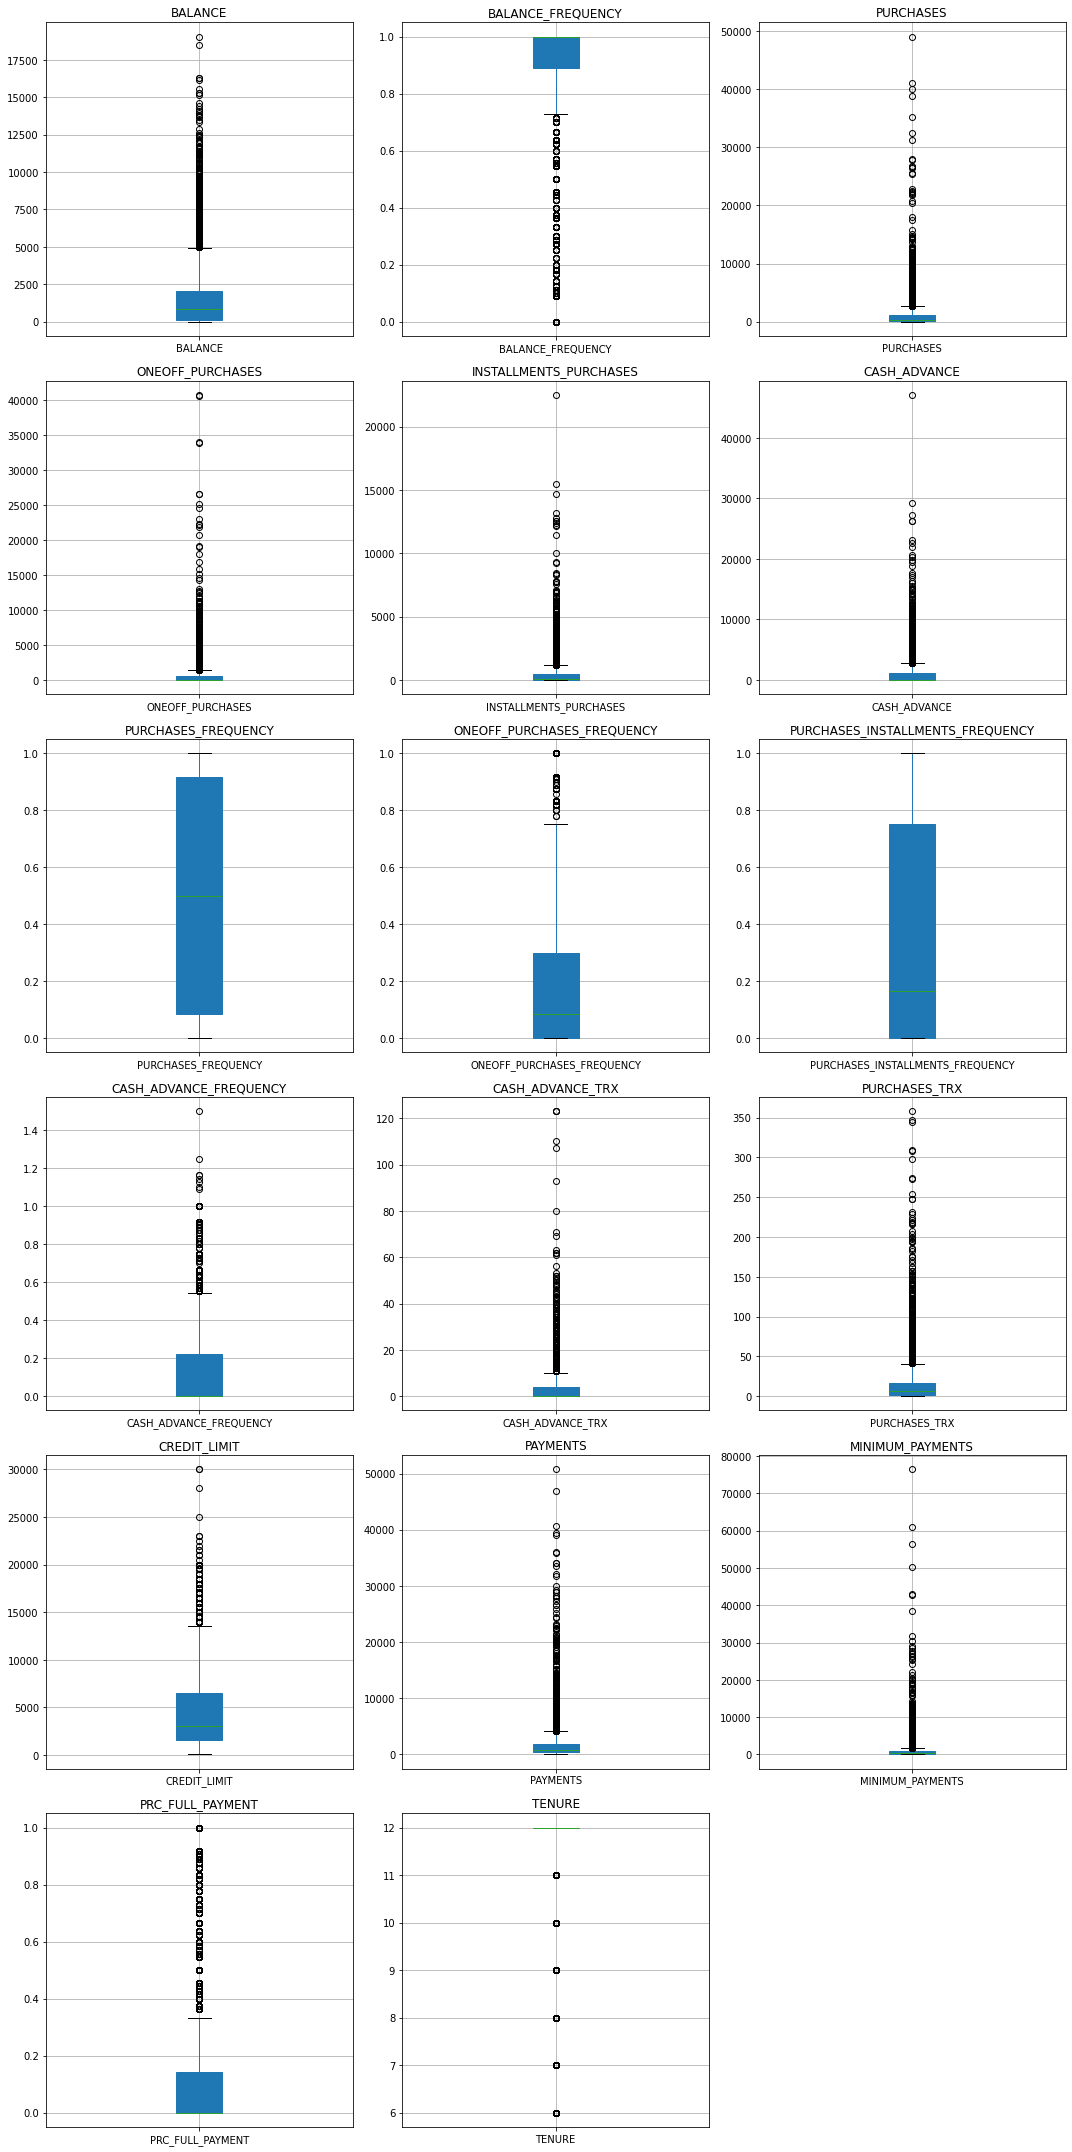

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
#df.drop(columns=['CUST_ID'], inplace=True)

# Number of columns and rows for subplot arrangement
NUM_COLS = len(df.columns)
NUM_ROWS = NUM_COLS // 3 + (1 if NUM_COLS % 3 != 0 else 0)

# Create subplots
fig, axes = plt.subplots(NUM_ROWS, 3, figsize=(15, 5*NUM_ROWS))

# Plot boxplots for each column and add outliers
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    bp = df.boxplot(column=col, ax=ax, patch_artist=True, showfliers=True)  # Change showfliers to True
    ax.set_title(col)

# Hide any unused subplots
for i in range(NUM_COLS, NUM_ROWS*3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [25]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [16]:
# Assess distribution for each column (skewness)
skewness = df.skew()
print("Skewness for each column:\n", skewness)


Skewness for each column:
 BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


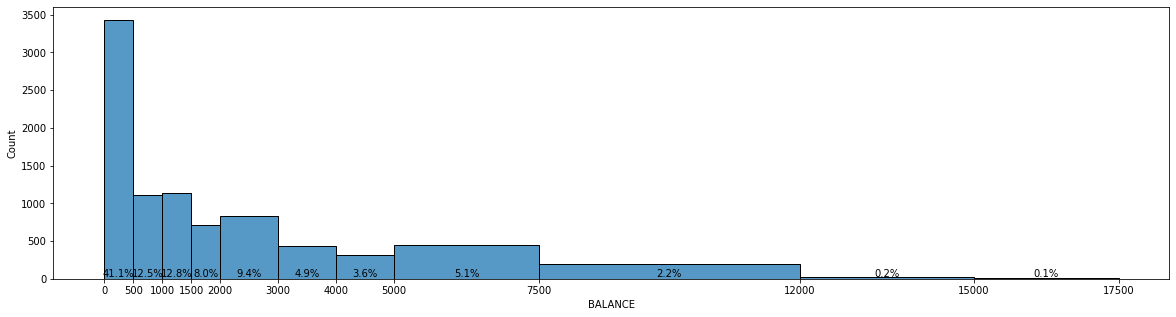

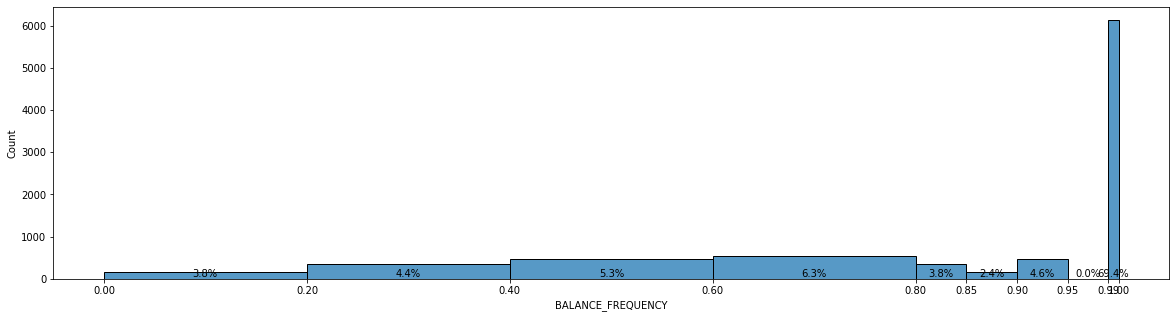

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

col = ["BALANCE", "BALANCE_FREQUENCY"]
bins = [[0, 500, 1000,1500, 2000, 3000,4000, 5000, 7500, 12000, 15000, 17500],
        [0, 0.2, 0.4, 0.6, 0.8, 0.85, 0.9, 0.95,0.99, 1]]

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    sns.histplot(data=dff, x=col[i], bins=bins[i])

    # Calculate percentage for each bin
    bin_counts = df[col[i]].value_counts(bins=bins[i], normalize=True).sort_index()
    for j, count in enumerate(bin_counts):
        plt.text(
            bin_counts.index[j].mid,
            count,
            f'{count:.1%}',
            ha='center',
            va='bottom'
        )

    # Set x-axis ticks to match bin edges
    plt.xticks(bins[i])

    plt.show()


## Insights of balance:
The analysis of account balances revealed three distinct categories based on the balance amount:

Approximately 41% of accounts have balances up to 500 unit..
s.
About 25% of accounts maintain balances ranging from 500 to 1500 uni..
ts.
The majority of accounts, constituting the remaining percentage, have balances exceeding 1500 un..i
The analysis of account balance frequency indicates that a significant portion, approximately 69% of accounts, exhibit a high frequency of balance updates, with a balance frequency ranging from 0.99 to 1. 






tely.


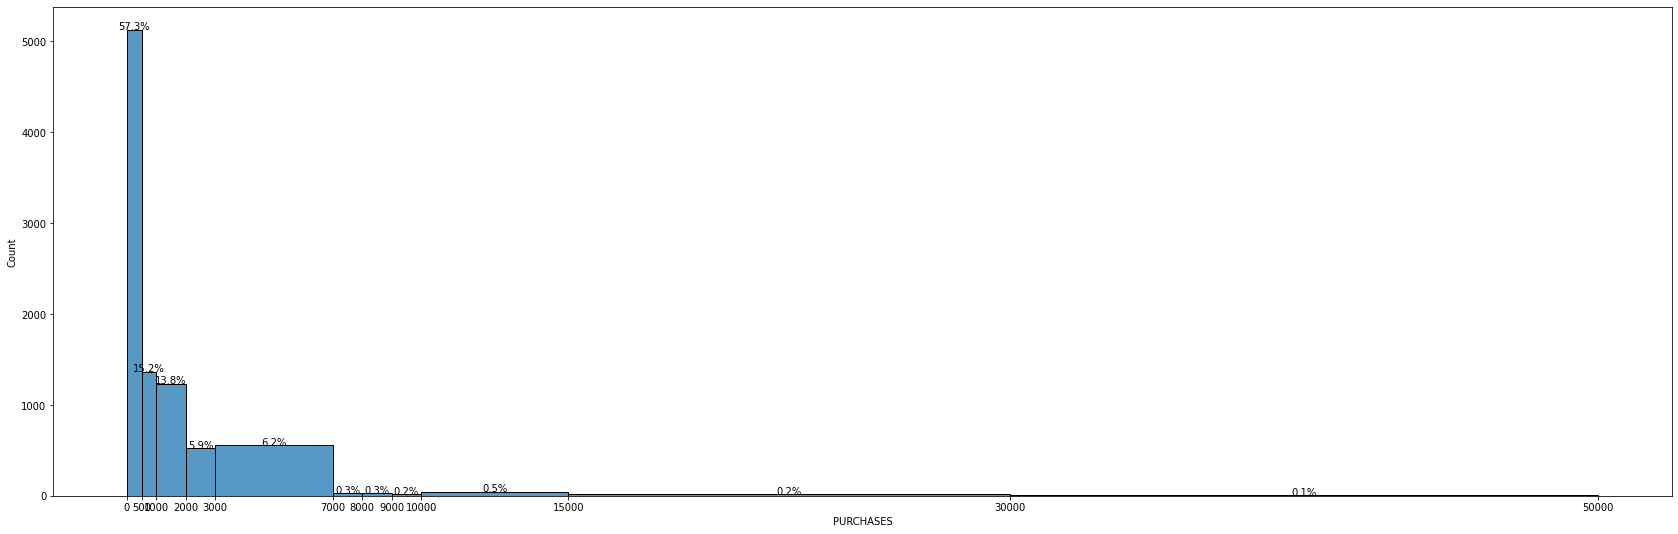

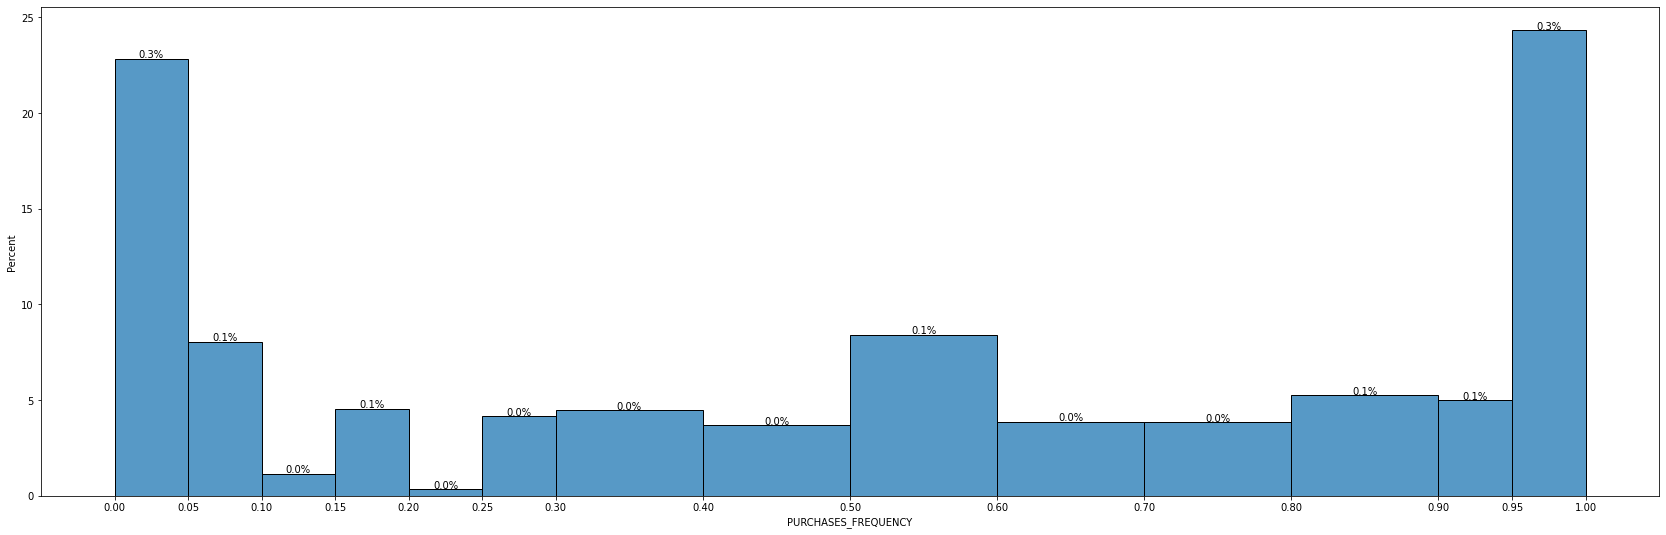

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

col = ['PURCHASES', 'PURCHASES_FREQUENCY']
bins = [[0,500,1000,2000,3000,7000,8000,9000,10000,15000,30000,50000], 
        [0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]]

stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(29, 9))
    ax = sns.histplot(data=df, x=col[i], bins=bins[i], stat=stat[i])

    total_count = len(df)
    
    # Adjust x-axis ticks to match bin edges
    ax.set_xticks(bins[i])

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + .05
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()


## The analysis of purchase amounts reveals the following distribution among accounts:

Approximately 57% of accounts have purchase amounts ranging from 0 to 500 units.
About 30% of accounts exhibit purchase amounts between 500 and 2000 units.
A smaller proportion, around 6% of accounts, fall within the range of 3000 to 7000 units.
The remaining accounts, constituting the rest, have purchase amounts exceeding 7000 units.
Furthermore, when considering purchase frequency, a minimal proportion of accounts are observed:

Roughly 30% of accounts demonstrate purchase frequencies ranging from 0 to 0.05.
Similarly, another 30% of accounts exhibit purchase frequencies from 0.95 to 1.
Understanding these patterns can inform targeted marketing strategies, product offerings, and promotional campaigns to cater to different customer segments based on their purchasing behaviors and preferences.

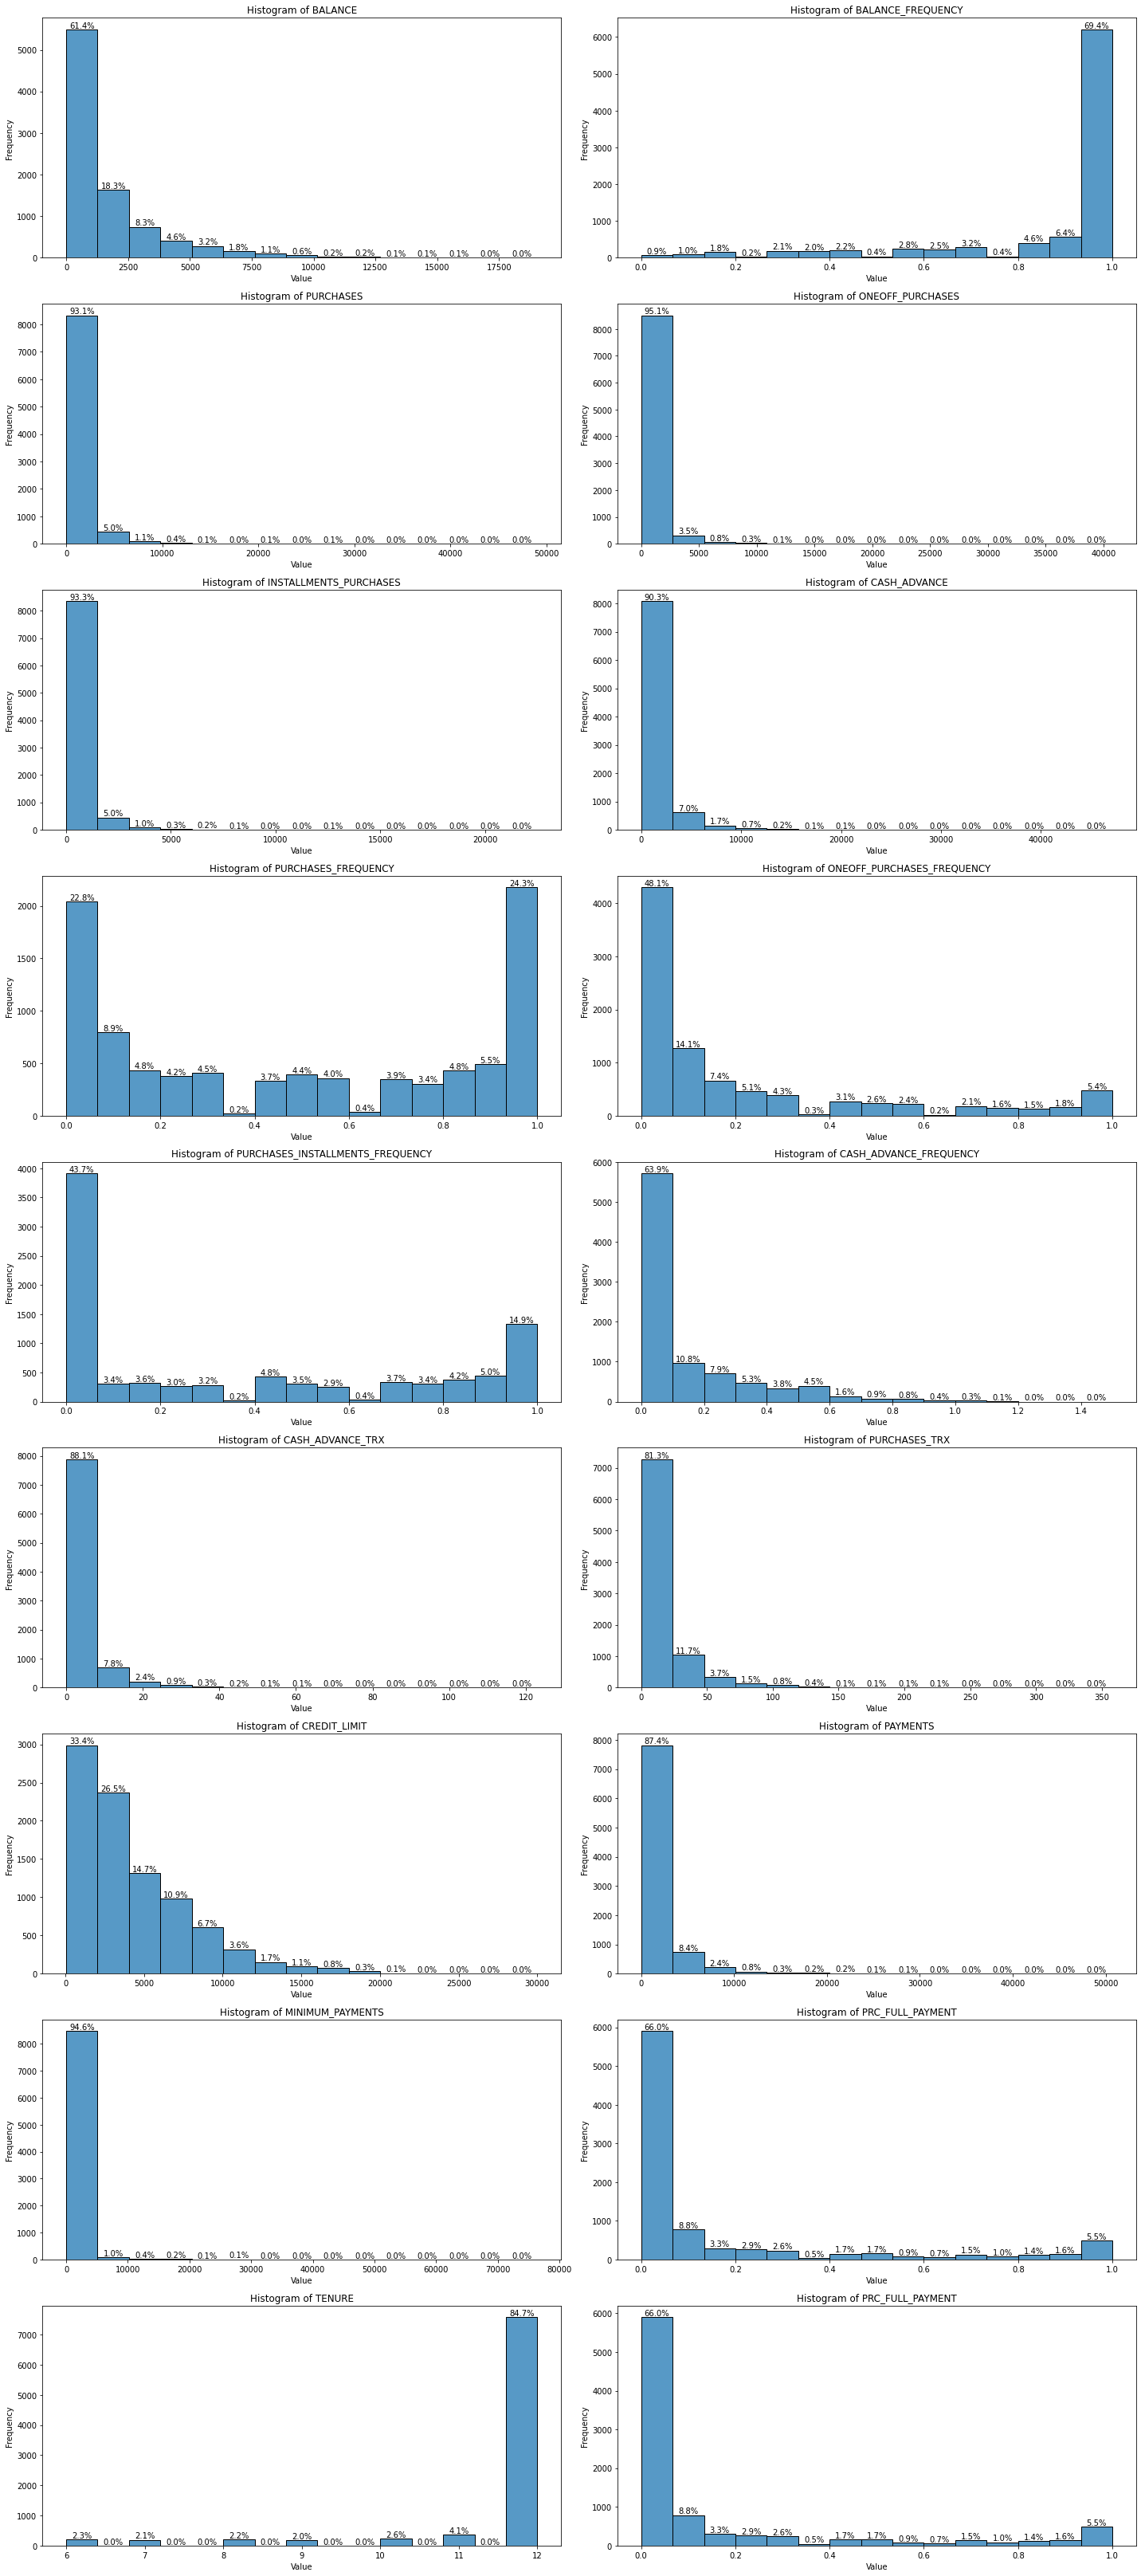

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define pairs of columns
column_pairs = [('BALANCE', 'BALANCE_FREQUENCY'),
                ('PURCHASES', 'ONEOFF_PURCHASES'),
                ('INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'),
                ('PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY'),
                ('PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'),
                ('CASH_ADVANCE_TRX', 'PURCHASES_TRX'),
                ('CREDIT_LIMIT', 'PAYMENTS'),
                ('MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'),
                ('TENURE', 'PRC_FULL_PAYMENT')]

# Set up subplots
num_rows = len(column_pairs)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Plot histograms for each pair of columns
for i, (col1, col2) in enumerate(column_pairs):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=df, x=col1, bins=15, ax=ax[0])
    sns.histplot(data=df, x=col2, bins=15, ax=ax[1])

    ax[0].set_title(f'Histogram of {col1}')
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    
    ax[1].set_title(f'Histogram of {col2}')
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Frequency')

    # Add percentage annotations
    for j in range(2):
        total_count = len(df)
        patches = ax[j].patches
        for patch in patches:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            percentage = '{:.1f}%'.format(100 * (y / total_count))
            ax[j].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


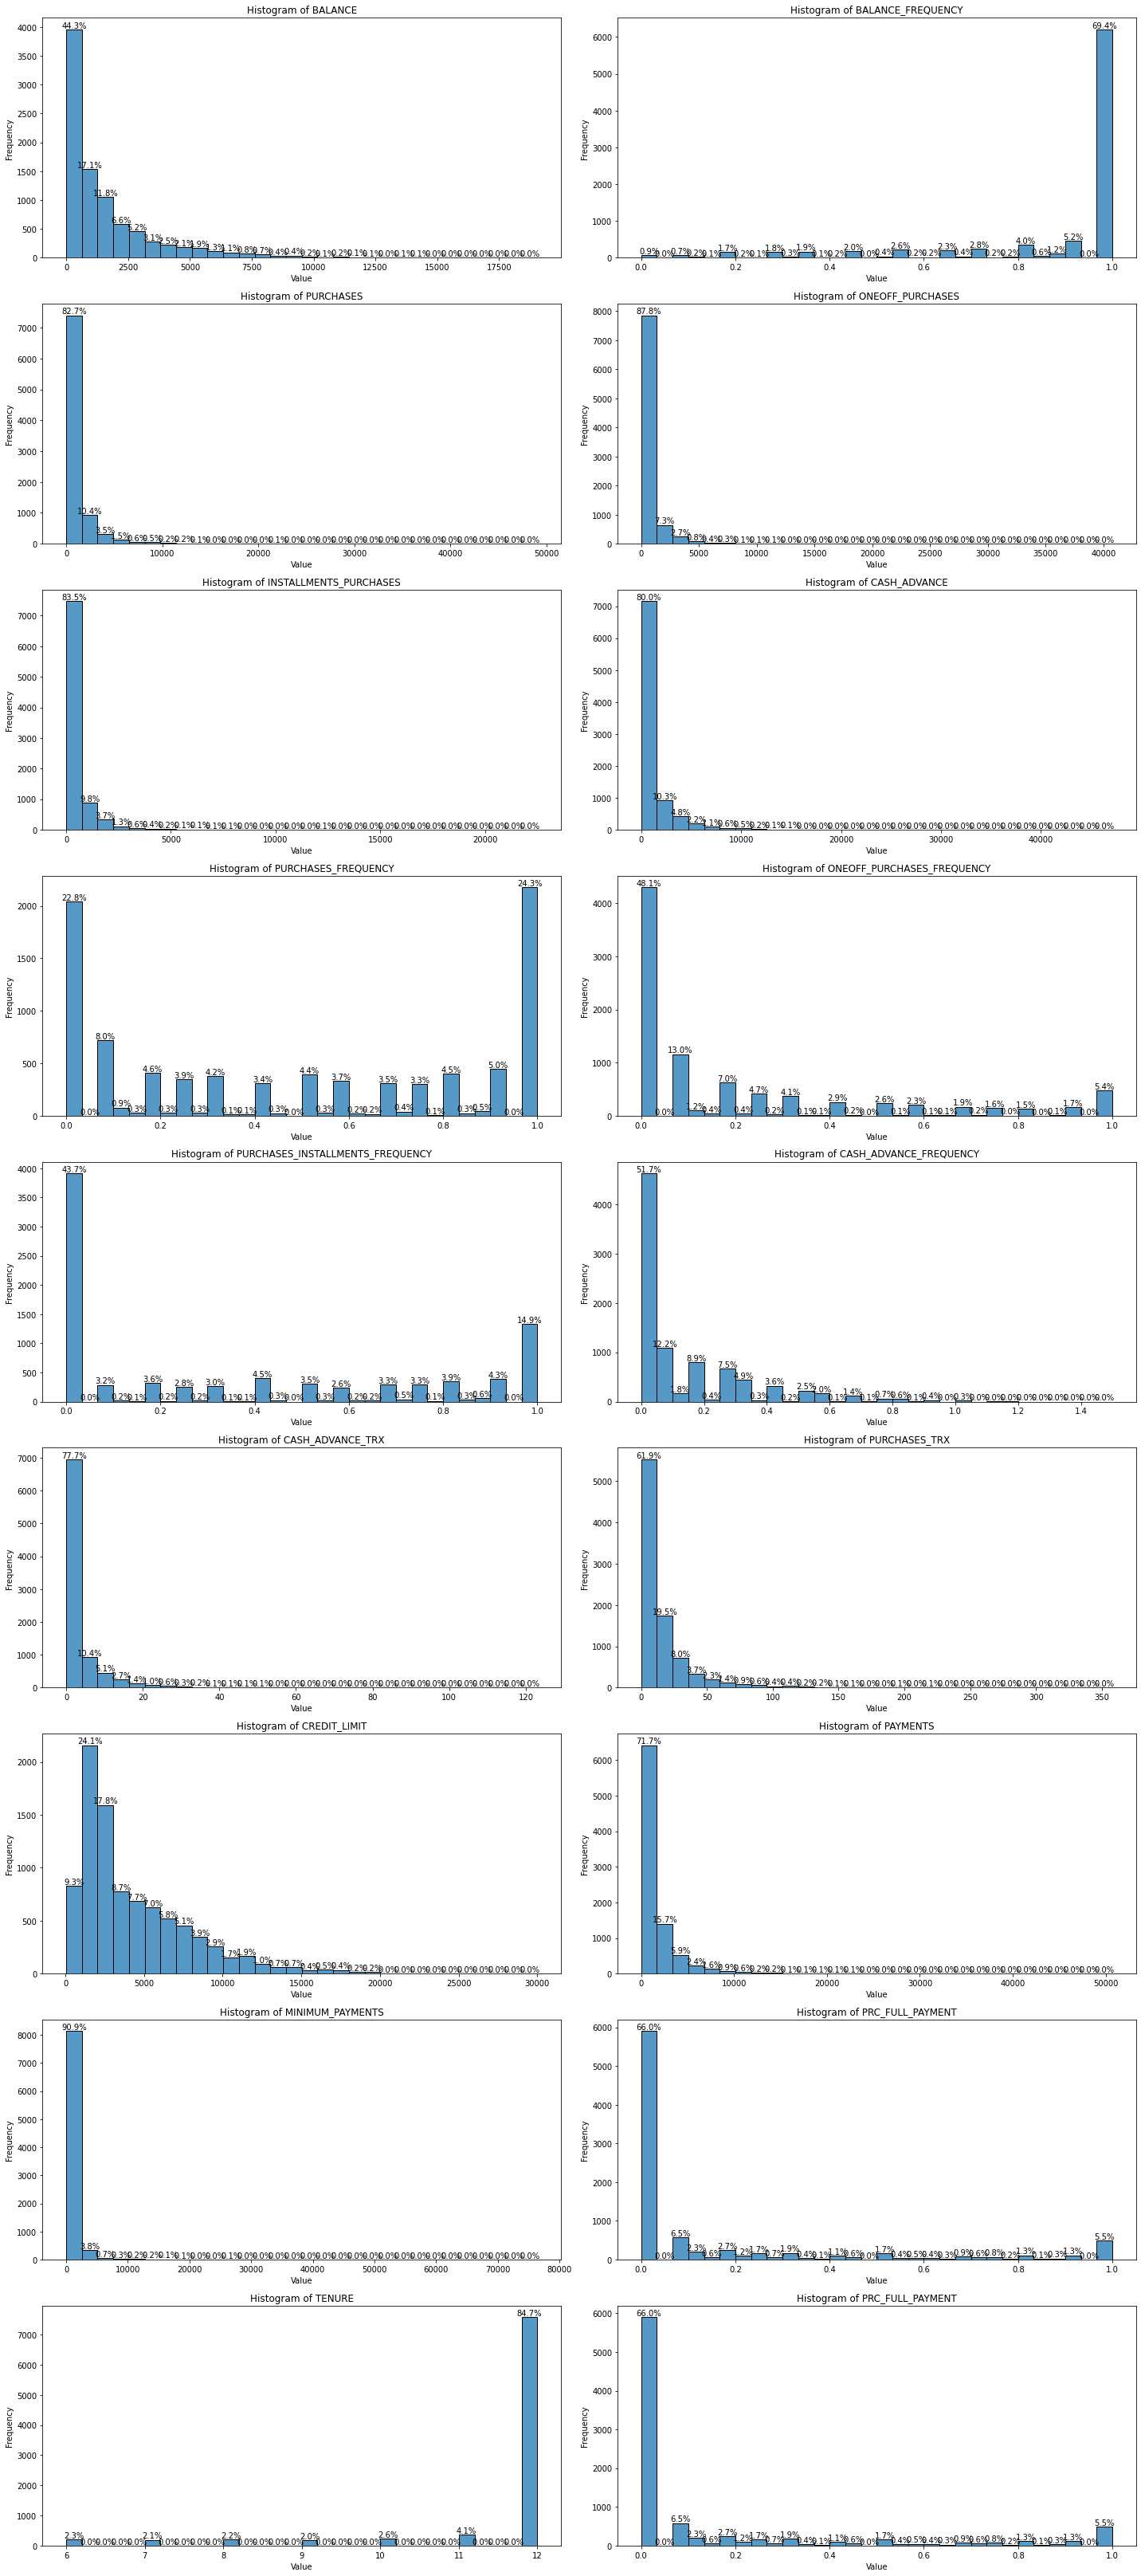

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pairs of columns
column_pairs = [('BALANCE', 'BALANCE_FREQUENCY'),
                ('PURCHASES', 'ONEOFF_PURCHASES'),
                ('INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'),
                ('PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY'),
                ('PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'),
                ('CASH_ADVANCE_TRX', 'PURCHASES_TRX'),
                ('CREDIT_LIMIT', 'PAYMENTS'),
                ('MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'),
                ('TENURE', 'PRC_FULL_PAYMENT')]

# Set up subplots
num_rows = len(column_pairs)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Plot histograms for each pair of columns
for i, (col1, col2) in enumerate(column_pairs):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=df, x=col1, bins=30, ax=ax[0])  # Increase number of bins
    sns.histplot(data=df, x=col2, bins=30, ax=ax[1])  # Increase number of bins

    ax[0].set_title(f'Histogram of {col1}')
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    
    ax[1].set_title(f'Histogram of {col2}')
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Frequency')

    # Add percentage annotations
    for j in range(2):
        total_count = len(df)
        patches = ax[j].patches
        for patch in patches:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            percentage = '{:.1f}%'.format(100 * (y / total_count))
            ax[j].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# The analysis of installment purchases reveals that:

Approximately 87% of accounts exhibit installment purchase amounts ranging from 0 to 2000 units.
The remaining accounts, constituting the remaining 7%, have installment purchase amounts exceeding 2000 units.
Understanding these patterns can aid in tailoring marketing strategies and product offerings to different customer segments based on their installment purchasing behaviors and preferences.

## Insights the rest of features in graph

The analysis of customer financial behavior reveals several key insights:

1. **Cash Advance Transactions:**
   - Most customers (95%) exhibit a reluctance to make frequent cash advance transactions.
   - However, nearly all customers (99%) have engaged in cash advance transactions occasionally, with transaction counts ranging from 0 to 50.



2. **Purchase Transactions:**
   - The majority of customers (96%) have participated in purchasing activities, with transaction counts ranging from 0 to 70, indicating varying levels of purchasing behavior.



3. **Credit Card Limits:**
   - A significant proportion (74%) of customers have credit card limits below $6000, suggesting a preference for moderate credit limits.



4. **Payment Behavior:**
   - Nearly all customers (98%) have made total payment amounts under $10,000,
      reflecting responsible credit management practices and conservative payment behavior.
     
   - Most customers have minimum payments below $15,000, indicating a tendency to manage credit card debt within reasonable limits.
   - A majority of customers (74%) do not opt for full payments, preferring partial payments or revolving credit utilization.



5. **Tenure of Credit Card Service:**
   - A significant portion (84%) of customers have a credit card tenure of 12 months, indicating a common duration of credit card service.

Overall, these insights provide valuable information about customer financial behavior, highlighting preferences, tendencies, and patterns in credit card usage and payment habits.


In [47]:
df.corr()


BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.310140   0.176083   
BALANCE_FREQUENCY                 0.310140           1.000000   0.122635   
PURCHASES                         0.176083           0.122635   1.000000   
ONEOFF_PURCHASES                  0.159985           0.095254   0.916780   
INSTALLMENTS_PURCHASES            0.122109           0.114739   0.679259   
CASH_ADVANCE                      0.495586           0.089036  -0.053760   
PURCHASES_FREQUENCY              -0.088459           0.228158   0.393000   
ONEOFF_PURCHASES_FREQUENCY        0.063832           0.187467   0.497384   
PURCHASES_INSTALLMENTS_FREQUENCY -0.069582           0.184159   0.316025   
CASH_ADVANCE_FREQUENCY            0.445307           0.181132  -0.124863   
CASH_ADVANCE_TRX                  0.382388           0.133265  -0.070277   
PURCHASES_TRX                     0.147887           0.183095   0.688732   
CREDIT_LIMIT                      0.535518           0.087682   0.358425   
PAYMENTS                          0.322830           0.039169   0.606782   
MINIMUM_PAYMENTS                  0.398669           0.132519   0.093842   
PRC_FULL_PAYMENT                 -0.333594          -0.156961   0.176447   
TENURE                            0.066987           0.104714   0.084545   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.159985                0.122109   
BALANCE_FREQUENCY                         0.095254                0.114739   
PURCHASES                                 0.916780                0.679259   
ONEOFF_PURCHASES                          1.000000                0.329650   
INSTALLMENTS_PURCHASES                    0.329650                1.000000   
CASH_ADVANCE                             -0.033244               -0.066099   
PURCHASES_FREQUENCY                       0.265460                0.441193   
ONEOFF_PURCHASES_FREQUENCY                0.524514                0.211829   
PURCHASES_INSTALLMENTS_FREQUENCY          0.128380                0.511130   
CASH_ADVANCE_FREQUENCY                   -0.086413               -0.136455   
CASH_ADVANCE_TRX                         -0.048705               -0.076716   
PURCHASES_TRX                             0.545313                0.626083   
CREDIT_LIMIT                              0.320613                0.258057   
PAYMENTS                                  0.570850                0.385391   
MINIMUM_PAYMENTS                          0.048741                0.132156   
PRC_FULL_PAYMENT                          0.129890                0.178440   
TENURE                                    0.063400                0.083346   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.495586            -0.088459   
BALANCE_FREQUENCY                     0.089036             0.228158   
PURCHASES                            -0.053760             0.393000   
ONEOFF_PURCHASES                     -0.033244             0.265460   
INSTALLMENTS_PURCHASES               -0.066099             0.441193   
CASH_ADVANCE                          1.000000            -0.218566   
PURCHASES_FREQUENCY                  -0.218566             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.090111             0.502123   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.178873             0.862338   
CASH_ADVANCE_FREQUENCY                0.629030            -0.316771   
CASH_ADVANCE_TRX                      0.656911            -0.208749   
PURCHASES_TRX                        -0.078449             0.567168   
CREDIT_LIMIT                          0.304161             0.121372   
PAYMENTS                              0.459342             0.100715   
MINIMUM_PAYMENTS                      0.140094             0.002979   
PRC_FULL_PAYMENT                     -0.158566             0.305393   
TENURE                               -0.073090        

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-null values in each column
           <br>
2each column has the proper data type          <br>
3outliers-           <br>

In [25]:
#make a copy for the original dataset
df_copy=df.copy()
#df_copy = df_copy.dropna()


### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

In [26]:
df_copy=df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ])

In [28]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']


In [29]:
df_copy = df_copy.dropna()


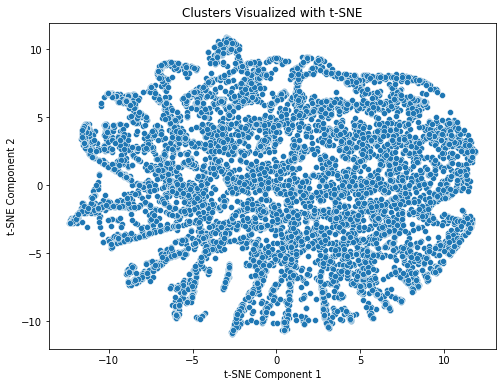

In [30]:
from matplotlib import rcParams
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30,n_iter=300) 
X_tsne = tsne.fit_transform(df_copy)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [31]:
df_copy[skewness_features] = np.log(df_copy[skewness_features] + 0.1)

In [32]:
df_copy.skew()


BALANCE                      -0.904675
BALANCE_FREQUENCY            -2.084161
PURCHASES                    -0.980708
INSTALLMENTS_PURCHASES       -0.140807
CASH_ADVANCE                  0.170686
PURCHASES_FREQUENCY           0.033041
ONEOFF_PURCHASES_FREQUENCY    1.504234
CASH_ADVANCE_TRX              0.393508
PURCHASES_TRX                -0.599293
CREDIT_LIMIT                 -0.107283
PAYMENTS                     -0.109795
MINIMUM_PAYMENTS              0.101950
PRC_FULL_PAYMENT              1.886027
TENURE                       -3.011141
dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler        # for Scalling
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df_copy)
scaled_df = pd.DataFrame(scaled_features, columns=df_copy.columns)

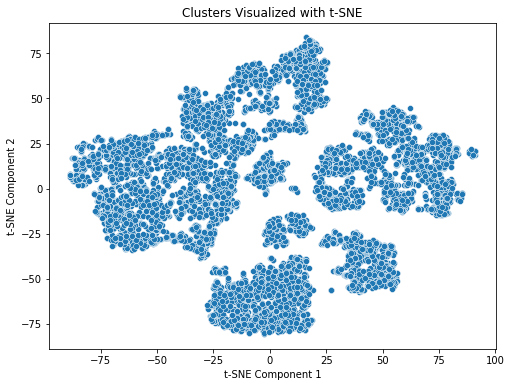

In [35]:
from matplotlib import rcParams
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(scaled_df)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()


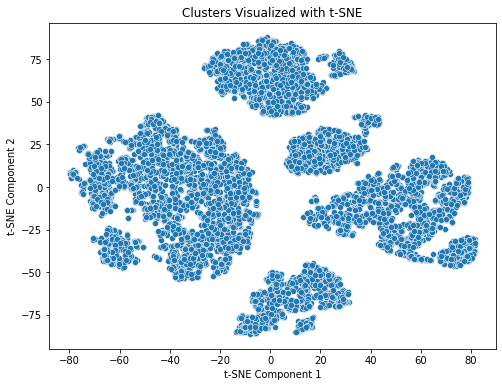

In [36]:
from matplotlib import rcParams
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(df_copy)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [ ]:
from sklearn import preprocessing

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [ ]:
silhouette = []

inertia = []
for k in range(2,11):
    kmeans = KMeans (n_clusters = k , random_state = 42)
    kmeans.fit(df_copy)
    
    score = silhouette_score (df_copy , kmeans.predict(df_copy))
    silhouette.append (score)
    

    score3 = kmeans.inertia_
    inertia.append (score3)

In [38]:
silhouette = []
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_copy)
    
    silhouette_score_value = silhouette_score(df_copy, cluster_labels)
    silhouette.append(silhouette_score_value)
    
    inertia_value = kmeans.inertia_
    inertia.append(inertia_value)


In [41]:
kmean_cluster_labels=cluster_labels
silhouette_avg = silhouette_score(df_copy, kmean_cluster_labels)
silhouette_avg

0.26626384591221886

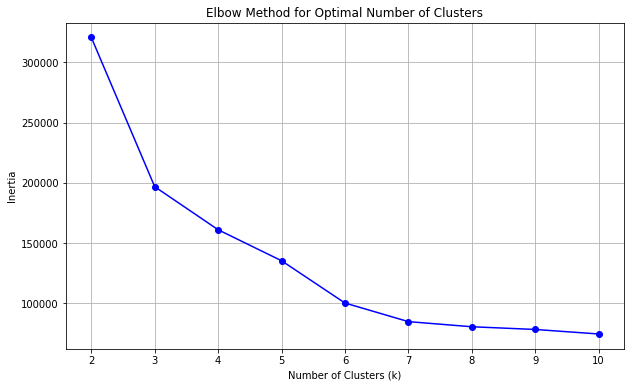

In [39]:
import matplotlib.pyplot as plt

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


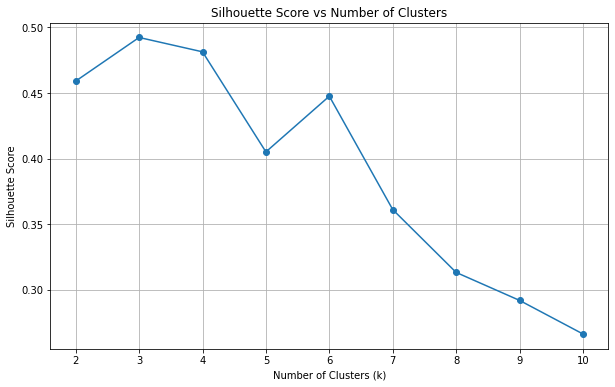

In [40]:
import matplotlib.pyplot as plt

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()



In [42]:
# Final model with k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_copy)


KMeans(n_clusters=5)

In [44]:
dff=df.dropna()

In [45]:
# assign the label
dff['Cluster_Id'] = kmeans.labels_
dff.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_Id  
0   201.802084        139.509787          0.000000      12           0  
1  4103.032597       1072.340217          0.222222      12           1  
2   622.066742        627.284787          0.000000      12           4  
4   678.334763        244.791237          0.000000      12           4  
5  1400.057770       2407.246035          0.000000      12           3

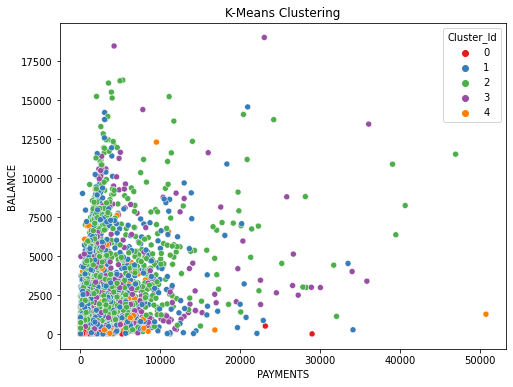

In [46]:
sns.scatterplot(data=dff, x='PAYMENTS', y='BALANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [47]:

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = scaler.fit_transform(df_copy)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df_copy.columns)

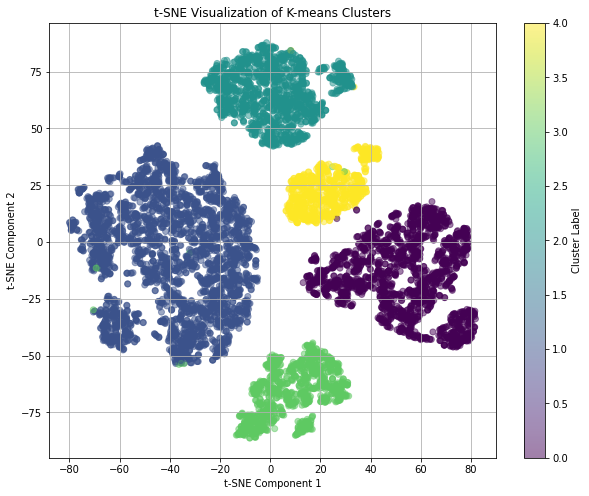

In [52]:

# Initialize K-means clustering
kmeans = KMeans(n_clusters=5)

# Fit K-means to the scaled data
cluster_labels = kmeans.fit_predict(df_copy)

# Initialize t-SNE
tsne = TSNE(n_components=2)

# Fit and transform the scaled data using t-SNE
tsne_data = tsne.fit_transform(df_copy)

# Plot the clusters with t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of K-means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [56]:

# Calculate silhouette scores for each sample
kmean_silhouette_scores = silhouette_samples(df_copy, cluster_labels)

# Calculate the average silhouette score
kmean_silhouette_avg = silhouette_score(df_copy, cluster_labels)
kmean_silhouette_scores ,kmean_silhouette_avg

(array([0.38179608, 0.58881998, 0.53438552, ..., 0.26478421, 0.28802961,
        0.25450544]),
 0.523370428454451)

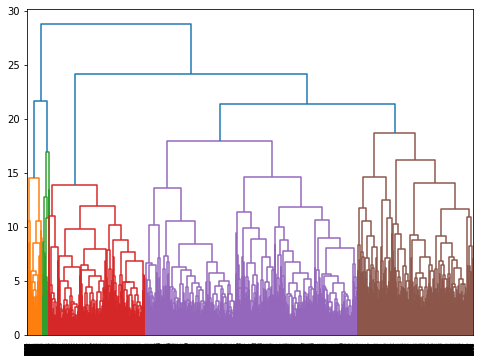

In [60]:
import scipy.cluster.hierarchy as shc

mergings_c = shc.linkage(df_copy, method="complete", metric='euclidean')
shc.dendrogram(mergings_c)
plt.show()

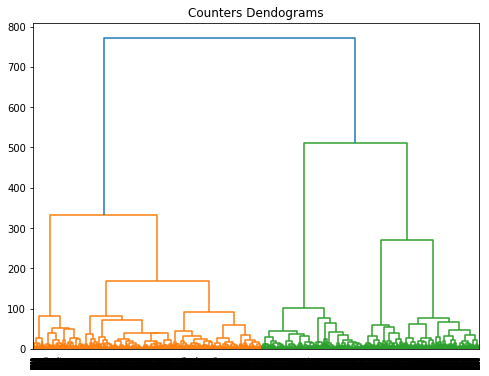

In [61]:
import scipy.cluster.hierarchy as shc
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy ,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

# I choose complete linkage method for hierarchical clustering because it is more efficient for our dataset compared to Ward's method. and it gives me 5 cluster 



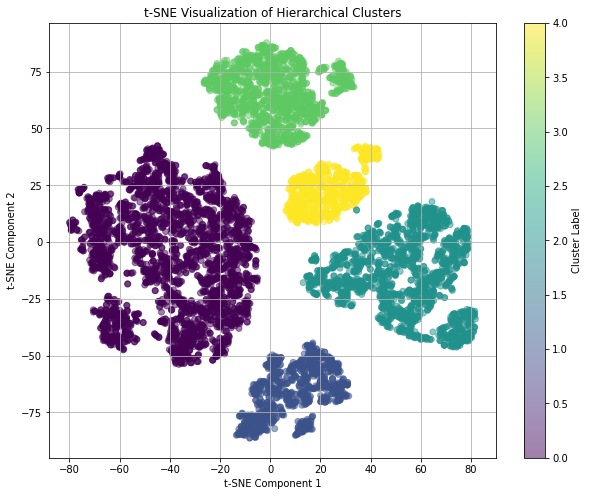

In [95]:
n_clusters = 5  
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit hierarchical clustering to the data
cluster_labels = hierarchical_model.fit_predict(df_copy)

# Initialize t-SNE
tsne = TSNE(n_components=2)

# Fit and transform the scaled data using t-SNE
tsne_data = tsne.fit_transform(df_copy)

# Plot the clusters with t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Hierarchical Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [96]:
# Calculate silhouette scores for each sample
hi_silhouette_scores = silhouette_samples(df_copy, cluster_labels)
hi_cluster_labels=cluster_labels
# Calculate the average silhouette score
hi_silhouette_avg = silhouette_score(df_copy, cluster_labels)
hi_silhouette_scores ,hi_silhouette_avg

(array([0.38325116, 0.58902664, 0.53842367, ..., 0.26579983, 0.28788038,
        0.25395511]),
 0.5234287321509444)

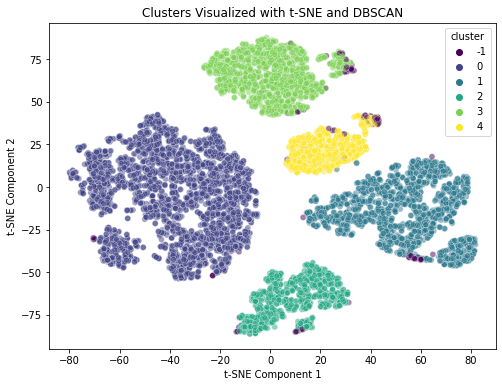

In [78]:
# Initialize the DBSCAN model
dbscan_model = DBSCAN(eps=3.6, min_samples=120)  

# Fit and predict clusters
cluster_labels = dbscan_model.fit_predict(df_copy)

# Add the cluster information to the reduced data
df_tsne['cluster'] = cluster_labels

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE and DBSCAN')
plt.show()



In [79]:
# Calculate silhouette scores for each sample
dbscan_silhouette_scores = silhouette_samples(df_copy, cluster_labels)

# Calculate the average silhouette score
dbscan_silhouette_avg = silhouette_score(df_copy, cluster_labels)
dbscan_silhouette_scores ,dbscan_silhouette_avg

(array([ 0.38119958,  0.59342979,  0.54971326, ...,  0.26797258,
        -0.20456116, -0.15084879]),
 0.5181649940031166)

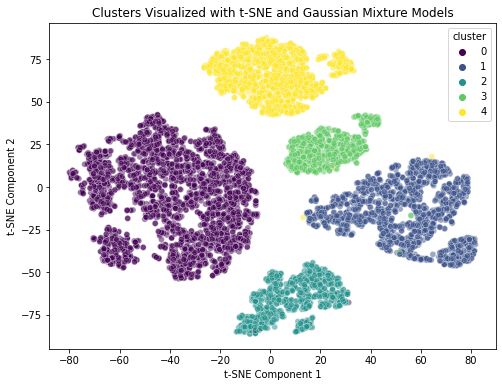

In [83]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Number of clusters (K)
n_clusters = 5

# Initialize the GaussianMixture model
gmm_model = GaussianMixture(n_components=n_clusters, random_state=50)
gmm_model.fit(df_copy)

# Predict cluster labels
gmm_labels = gmm_model.predict(df_copy)

# Add the cluster information to the reduced data
df_tsne['cluster'] = gmm_labels

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE and Gaussian Mixture Models')
plt.show()


In [84]:
# Calculate silhouette scores for each sample
gm_silhouette_scores = silhouette_samples(df_copy, gmm_labels)

# Calculate the average silhouette score
gm_silhouette_avg = silhouette_score(df_copy, gmm_labels)
gm_silhouette_scores ,gm_silhouette_avg

(array([0.38271816, 0.58798105, 0.53899359, ..., 0.26531437, 0.28656108,
        0.25065219]),
 0.5214227589867483)

In [91]:
n=[gm_silhouette_avg,dbscan_silhouette_avg,hi_silhouette_avg,kmean_silhouette_avg]
max_number = max(n)
max_index = n.index(max_number)

max_number,max_index

(0.5234287321509444, 2)

 Based on the comparison of silhouette scores, the hierarchical clustering model achieved the highest silhouette score, indicating that it provides the best clusterin # solution among the models evaluated.


In [93]:
df_clustered=df.dropna()

In [97]:
df_clustered['hi_cluster_labels']=hi_cluster_labels
df_clustered

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8945  C19186    28.493517           1.000000     291.12              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0      201.802084        139.509787          0.000000      12   
1     4103.032597       1072.340217          0.222222      12   
2      622.066742        627.284787          0.000000      12   
4      678.334763        244.791237          0.000000      12   
5     1400.057770       2407.246035          0.000000      12   
...           ...               ...               ...     ...   
8943    58.644883         43.4

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [115]:
cluster_analysis = df_clustered.groupby('hi_cluster_labels').max()
cluster_analysis

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  \
hi_cluster_labels                                                      
0                  C19188  19043.13856                1.0   41050.40   
1                  C19184  12323.84536                1.0   17945.00   
2                  C19189  14581.45914                1.0       1.00   
3                  C19182  16304.88925                1.0   49039.57   
4                  C19190  15258.22590                1.0   22101.78   

                   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
hi_cluster_labels                                                           
0                          40624.06                22500.00       0.00000   
1                          17945.00                    0.00       0.00000   
2                              1.00                   66.95   26194.04954   
3                          40761.25                14686.10   47137.21176   
4                          22101.78                    0.00   20277.33112   

                   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
hi_cluster_labels                                                    
0                             1.000000                    1.000000   
1                             1.000000                    1.000000   
2                             0.090909                    0.090909   
3                             1.000000                    1.000000   
4                             1.000000                    1.000000   

                   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
hi_cluster_labels                                                             
0                                          1.000000                    0.00   
1                                          0.333333                    0.00   
2                                          0.166667                    1.50   
3                                          1.000000                    1.00   
4                                          0.000000                    1.25   

                   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
hi_cluster_labels                                                               
0                                 0            358       30000.0  36066.75068   
1                                 0            217       25000.0  50721.48336   
2                               123              2       19000.0  34107.07499   
3                               123            347       30000.0  46930.59824   
4                                93            309       20000.0  39461.96580   

                   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
hi_cluster_labels                                              
0                       76406.20752               1.0      12  
1                       30528.43240               1.0      12  
2                       61031.61860               1.0      12  
3                       31871.36379               1.0      12  
4                       19060.53475               1.0      12

In [116]:
cluster_analysis = df_clustered.groupby('hi_cluster_labels').min()
cluster_analysis

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
hi_cluster_labels                                                   
0                  C10001  0.000000           0.000000       4.80   
1                  C10003  0.000000           0.000000       0.00   
2                  C10002  0.001146           0.090909       0.00   
3                  C10016  1.097736           0.181818       4.44   
4                  C10027  1.599053           0.181818       2.00   

                   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
hi_cluster_labels                                                           
0                               0.0                    1.95      0.000000   
1                               0.0                    0.00      0.000000   
2                               0.0                    0.00     18.042768   
3                               0.0                    4.44     14.222216   
4                               2.0                    0.00     18.280043   

                   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
hi_cluster_labels                                                    
0                             0.083333                    0.000000   
1                             0.083333                    0.000000   
2                             0.000000                    0.000000   
3                             0.083333                    0.000000   
4                             0.083333                    0.083333   

                   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
hi_cluster_labels                                                             
0                                          0.083333                0.000000   
1                                          0.000000                0.000000   
2                                          0.000000                0.083333   
3                                          0.083333                0.083333   
4                                          0.000000                0.083333   

                   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   PAYMENTS  \
hi_cluster_labels                                                             
0                                 0              0         300.0   4.841543   
1                                 0              0         150.0   0.056466   
2                                 1              0          50.0   0.049513   
3                                 1              1         300.0  32.924384   
4                                 1              1         200.0  28.654864   

                   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
hi_cluster_labels                                              
0                          0.019163               0.0       6  
1                          0.055880               0.0       6  
2                          0.117036               0.0       6  
3                          9.801394               0.0       6  
4                          3.197940               0.0       6

In [110]:
cluster_analysis = df_clustered.groupby('hi_cluster_labels').mean()
cluster_analysis

BALANCE  BALANCE_FREQUENCY    PURCHASES  \
hi_cluster_labels                                                
0                   825.404578           0.881473  1528.079115   
1                   789.498216           0.791473   903.747266   
2                  2211.164444           0.903609     0.001050   
3                  2747.353544           0.965989  1501.831313   
4                  2373.181721           0.933895   669.853329   

                   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
hi_cluster_labels                                                           
0                        766.787492              761.836169      0.000000   
1                        903.840636                0.000000      0.000000   
2                          0.001050                0.044115   2011.201239   
3                        801.131614              701.114172   2080.542106   
4                        669.898303                0.000000   2046.463232   

                   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
hi_cluster_labels                                                    
0                             0.764942                    0.233335   
1                             0.362724                    0.362062   
2                             0.000215                    0.000215   
3                             0.740781                    0.273117   
4                             0.278736                    0.278628   

                   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
hi_cluster_labels                                                             
0                                          0.663951                0.000000   
1                                          0.000331                0.000000   
2                                          0.000127                0.276716   
3                                          0.622789                0.282638   
4                                          0.000000                0.297572   

                   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
hi_cluster_labels                                                               
0                          0.000000      23.494015   4430.048234  1554.026491   
1                          0.000000       8.010934   4420.388276  1212.595351   
2                          6.410452       0.004566   4053.483849  1712.802896   
3                          7.273598      24.858413   5366.218270  2708.601191   
4                          6.930052       6.410622   4660.783090  1985.015233   

                   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
hi_cluster_labels                                                 
0                        663.926071          0.292342  11.658102  
1                        497.514619          0.144645  11.609344  
2                       1006.527300          0.046029  11.360223  
3                       1307.503385          0.062887  11.528728  
4                       1028.828665          0.059974  11.343264

In [117]:
cluster_analysis = df_clustered.groupby('hi_cluster_labels').median()
cluster_analysis

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
hi_cluster_labels                                              
0                   218.350430                1.0    684.200   
1                   287.655250                1.0    455.295   
2                  1502.444690                1.0      0.000   
3                  1877.840457                1.0    849.970   
4                  1625.825247                1.0    291.630   

                   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
hi_cluster_labels                                                           
0                            25.000                 418.800      0.000000   
1                           455.295                   0.000      0.000000   
2                             0.000                   0.000   1222.166225   
3                           241.640                 416.005   1124.873300   
4                           291.630                   0.000   1160.371480   

                   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
hi_cluster_labels                                                    
0                             0.909091                    0.083333   
1                             0.250000                    0.250000   
2                             0.000000                    0.000000   
3                             0.833333                    0.166667   
4                             0.166667                    0.166667   

                   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
hi_cluster_labels                                                             
0                                          0.750000                    0.00   
1                                          0.000000                    0.00   
2                                          0.000000                    0.25   
3                                          0.666667                    0.25   
4                                          0.000000                    0.25   

                   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
hi_cluster_labels                                                               
0                               0.0           13.0        3000.0   780.526454   
1                               0.0            4.0        3000.0   608.230077   
2                               4.0            0.0        3000.0   804.570403   
3                               4.0           15.0        4500.0  1570.966689   
4                               5.0            3.0        3500.0  1146.380005   

                   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
hi_cluster_labels                                              
0                        181.386587          0.083333    12.0  
1                        193.212128          0.000000    12.0  
2                        487.840515          0.000000    12.0  
3                        769.597884          0.000000    12.0  
4                        546.921879          0.000000    12.0

In [111]:
cluster_analysis = df_clustered.groupby('hi_cluster_labels').count()
cluster_analysis

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  \
hi_cluster_labels                                                   
0                     3425     3425               3425       3425   
1                     1006     1006               1006       1006   
2                     1971     1971               1971       1971   
3                     1462     1462               1462       1462   
4                      772      772                772        772   

                   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
hi_cluster_labels                                                           
0                              3425                    3425          3425   
1                              1006                    1006          1006   
2                              1971                    1971          1971   
3                              1462                    1462          1462   
4                               772                     772           772   

                   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
hi_cluster_labels                                                    
0                                 3425                        3425   
1                                 1006                        1006   
2                                 1971                        1971   
3                                 1462                        1462   
4                                  772                         772   

                   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
hi_cluster_labels                                                             
0                                              3425                    3425   
1                                              1006                    1006   
2                                              1971                    1971   
3                                              1462                    1462   
4                                               772                     772   

                   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
hi_cluster_labels                                                            
0                              3425           3425          3425      3425   
1                              1006           1006          1006      1006   
2                              1971           1971          1971      1971   
3                              1462           1462          1462      1462   
4                               772            772           772       772   

                   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
hi_cluster_labels                                              
0                              3425              3425    3425  
1                              1006              1006    1006  
2                              1971              1971    1971  
3                              1462              1462    1462  
4                               772               772     772

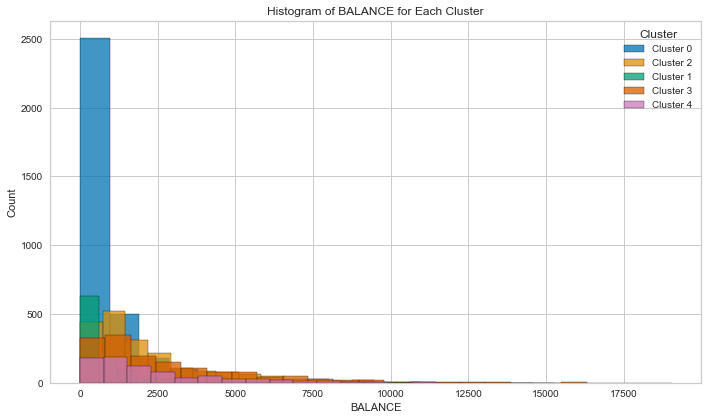

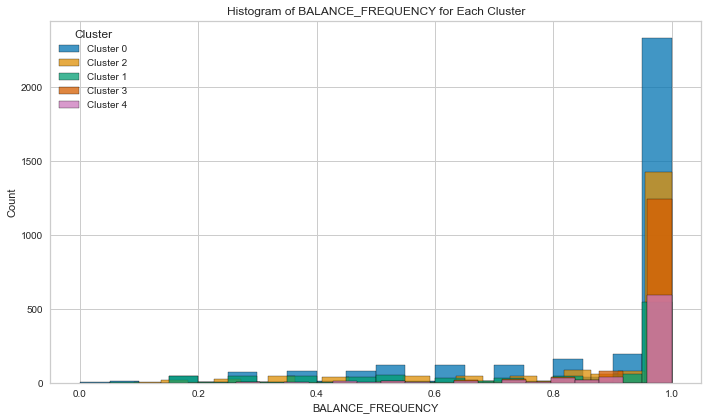

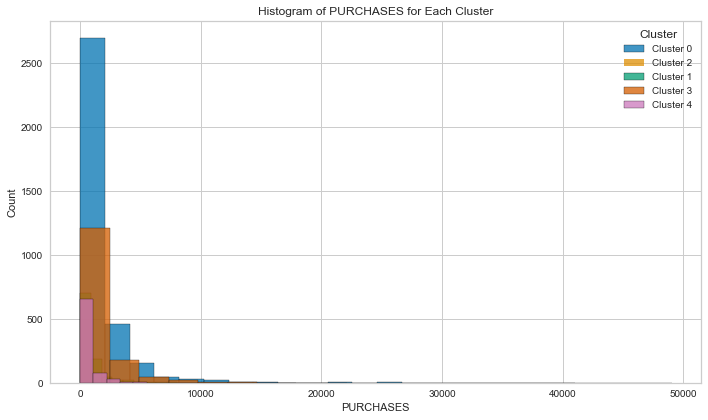

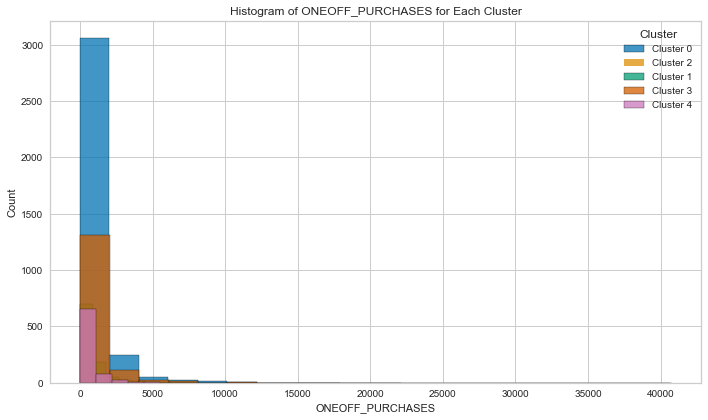

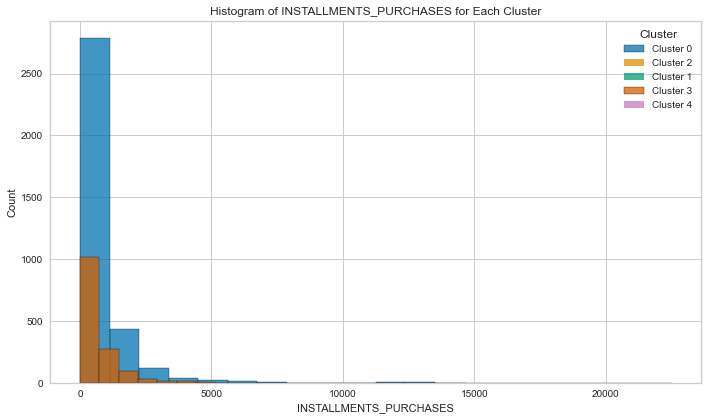

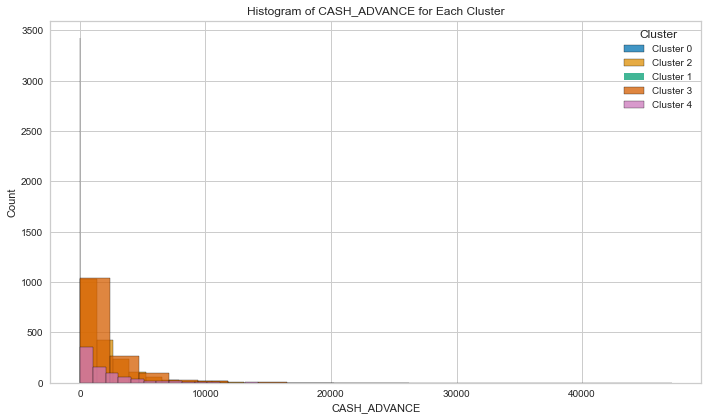

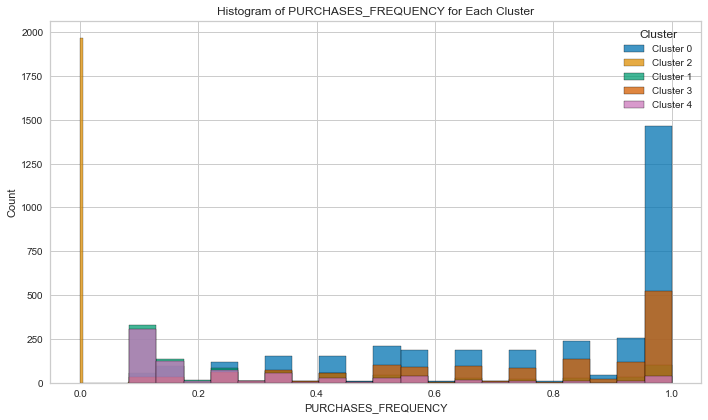

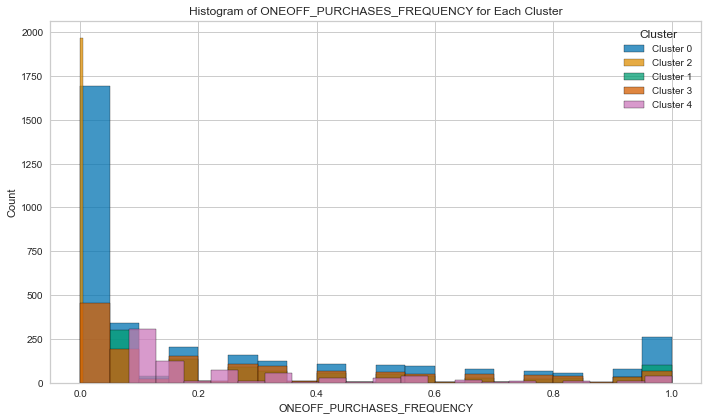

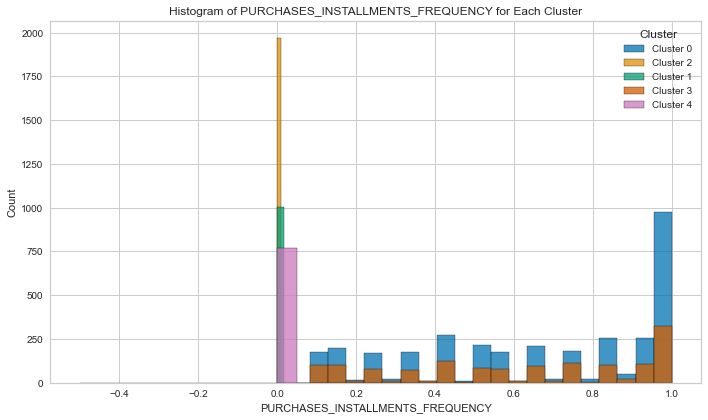

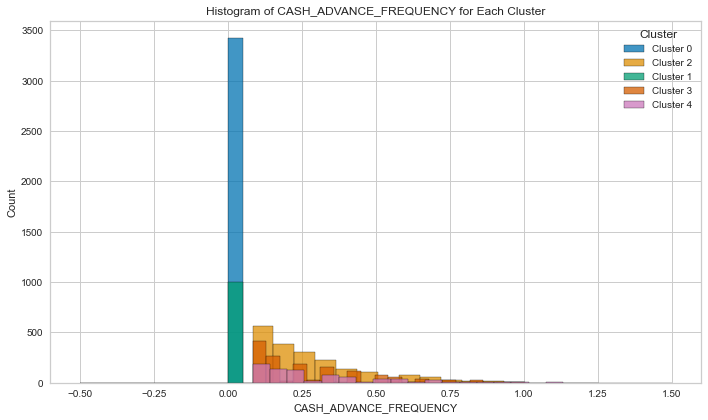

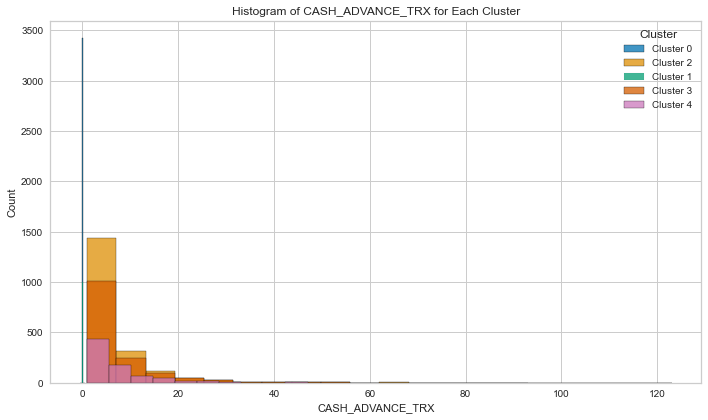

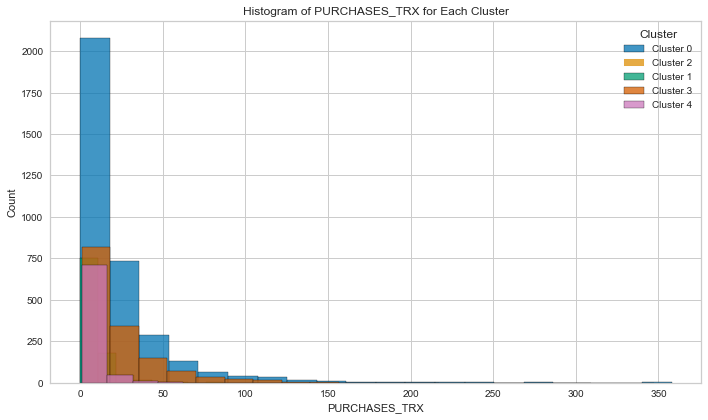

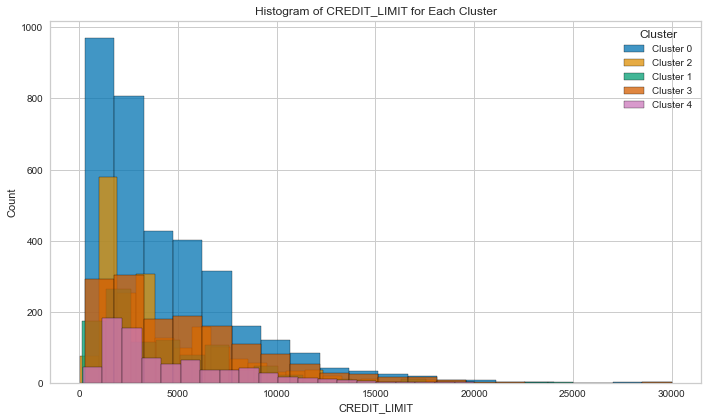

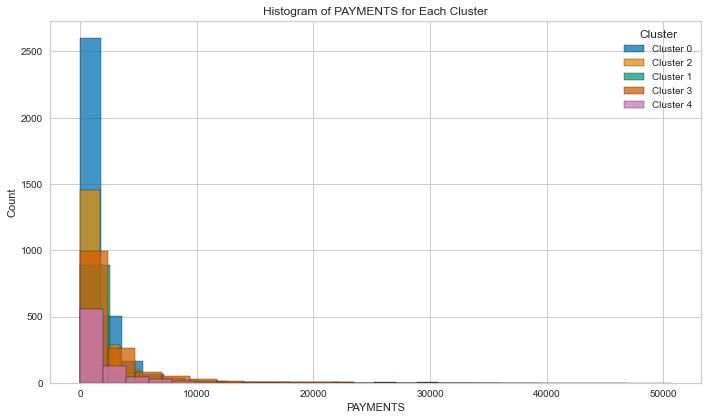

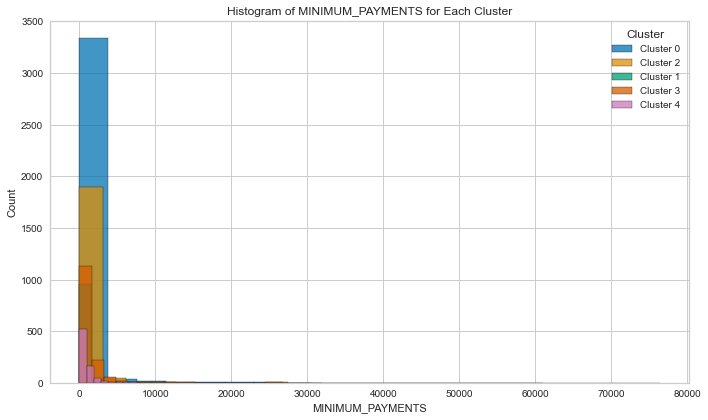

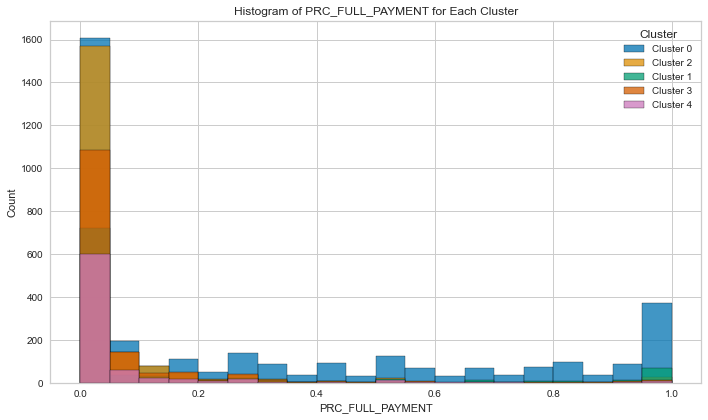

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the list of columns of interest
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Iterate over each selected column individually
for column in columns_of_interest:
    # Create a figure and axis for each column
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Iterate over each cluster
    for cluster_label, color in zip(df_clustered['hi_cluster_labels'].unique(), sns.color_palette('colorblind', 5)):
        # Select data for the current cluster
        cluster_data = df_clustered[df_clustered['hi_cluster_labels'] == cluster_label]

        # Plot histogram for the selected column
        sns.histplot(cluster_data[column], bins=20, kde=False, color=color, label=f'Cluster {cluster_label}', ax=ax)

    # Set labels and title for the plot
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histogram of {column} for Each Cluster')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()


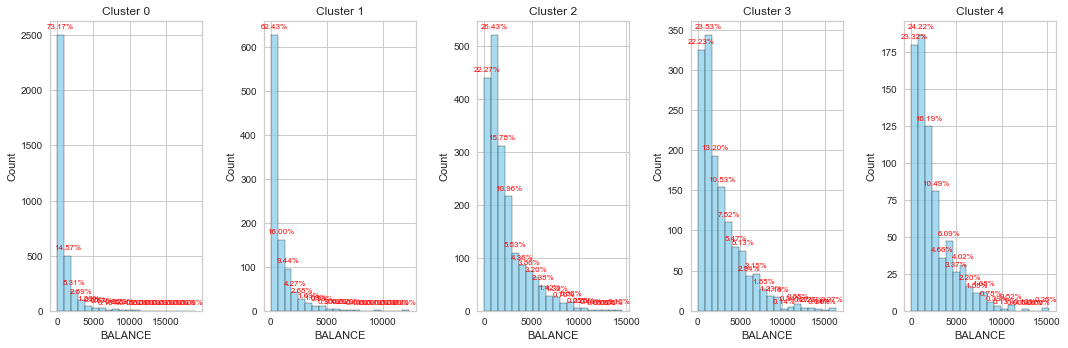

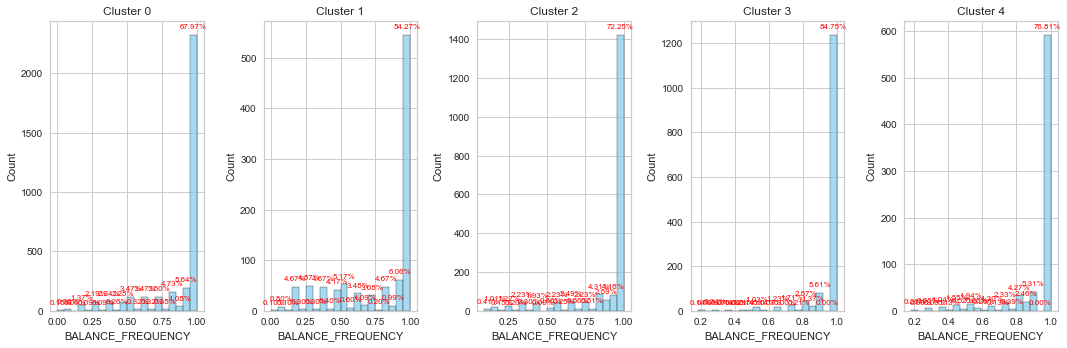

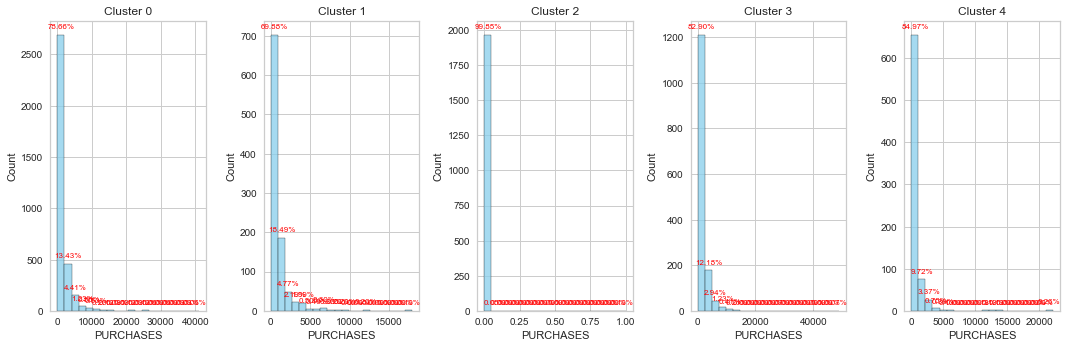

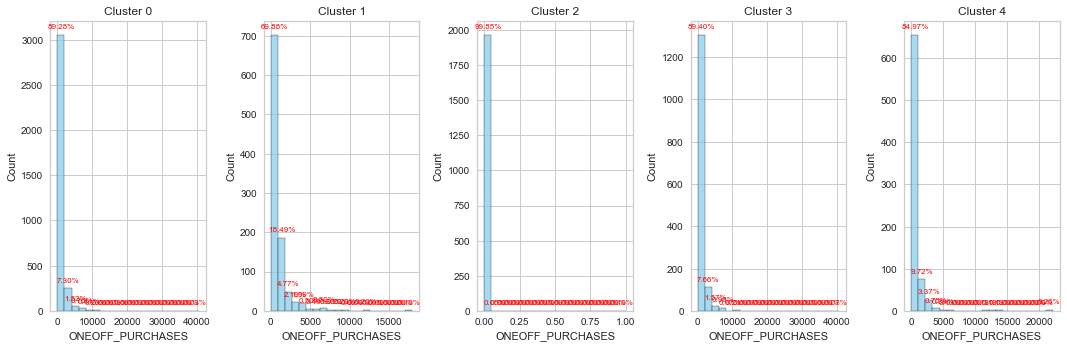

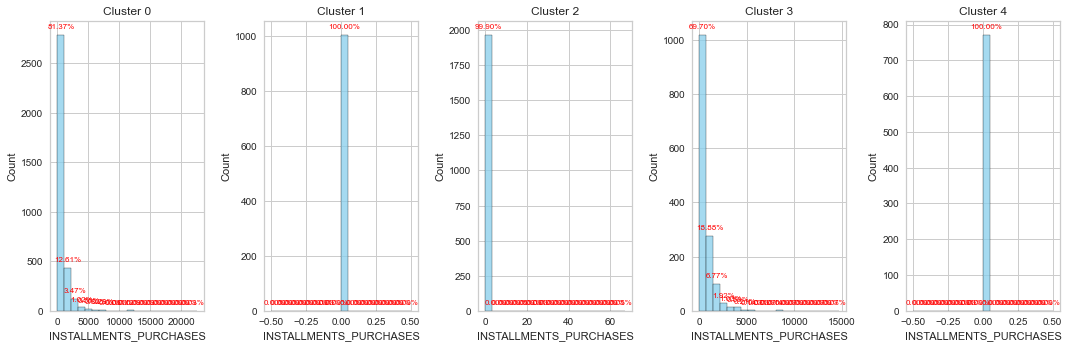

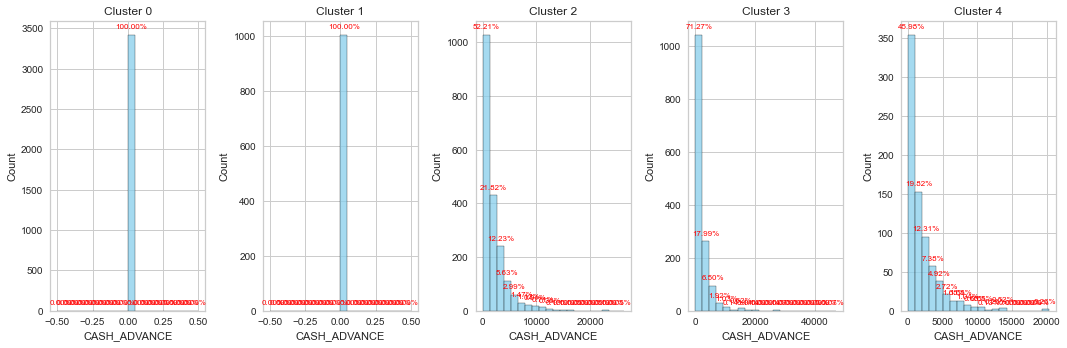

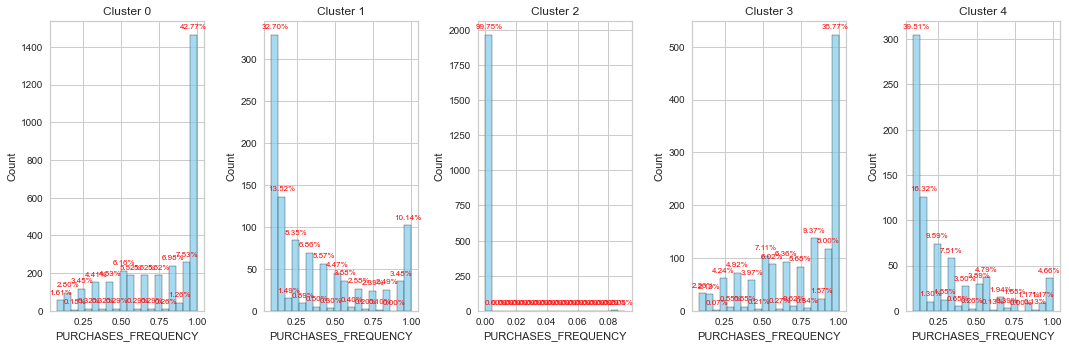

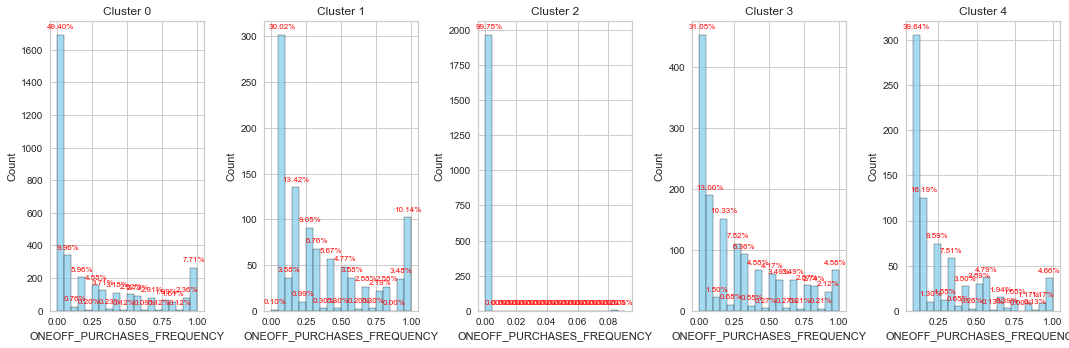

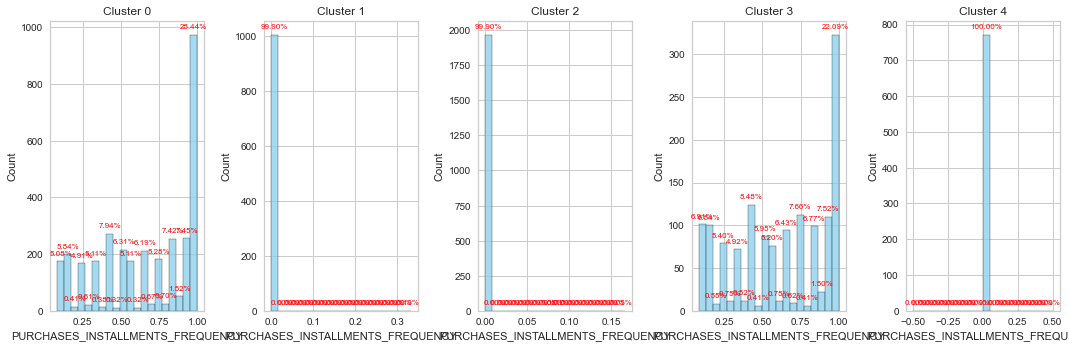

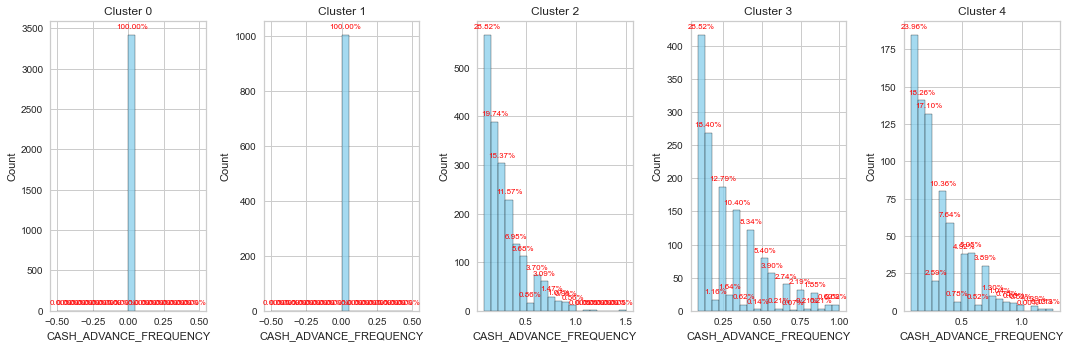

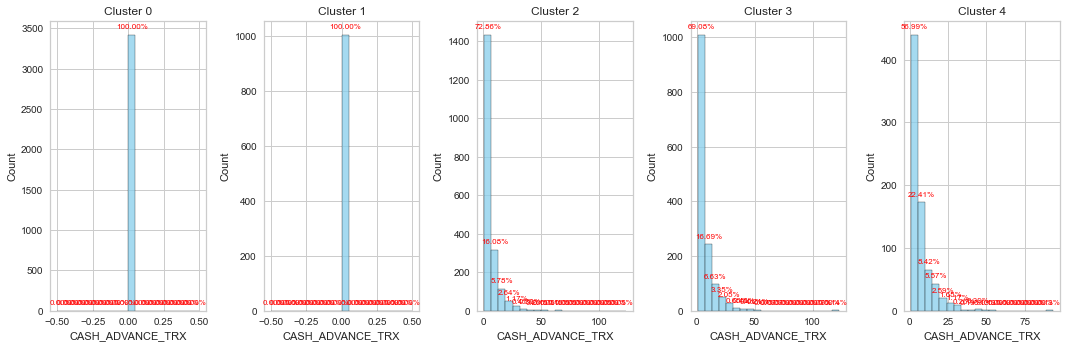

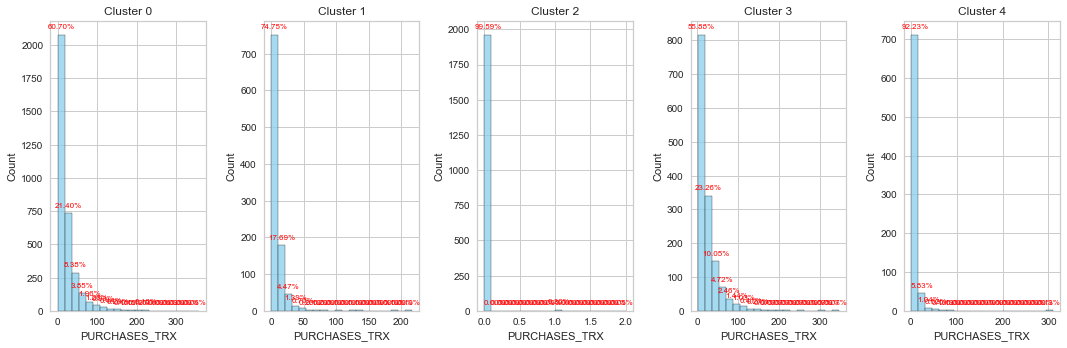

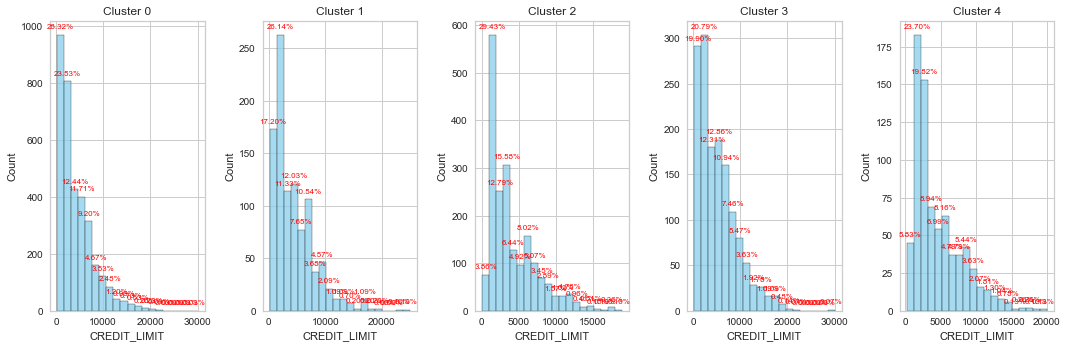

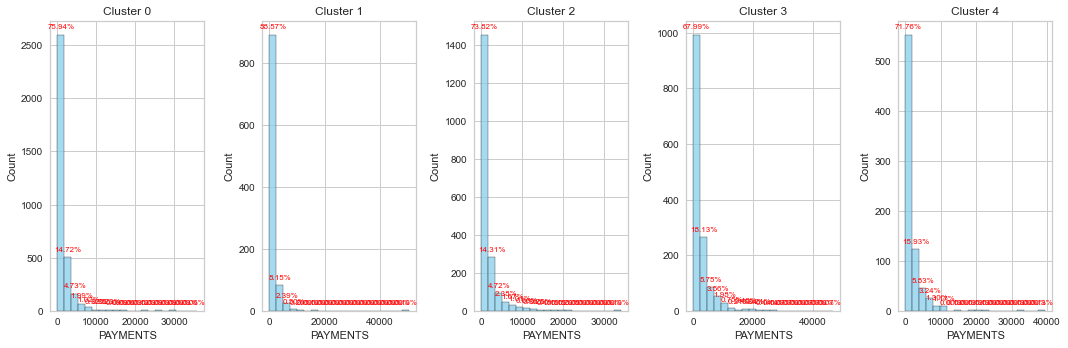

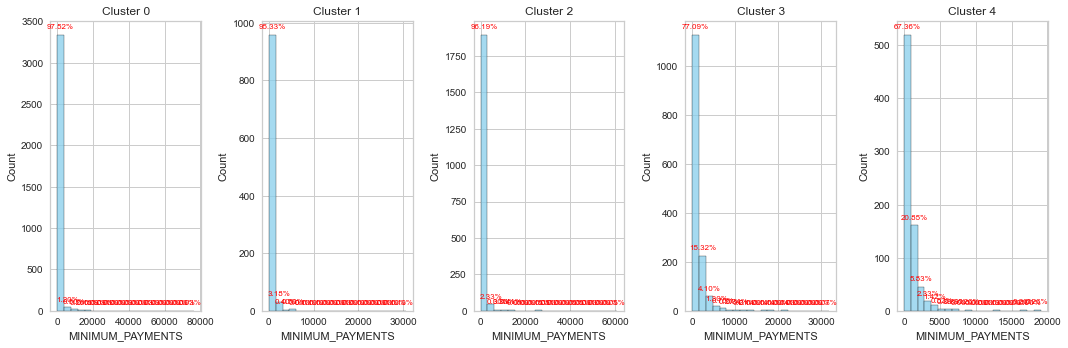

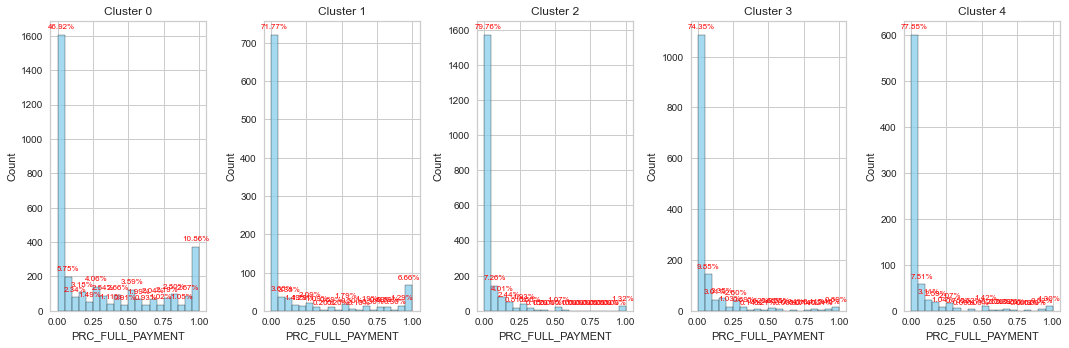

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the list of columns of interest
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Iterate over each selected column individually
for column in columns_of_interest:
    # Create a separate plot for each cluster
    plt.figure(figsize=(15, 5))
    for cluster_label in df_clustered['hi_cluster_labels'].unique():
        # Select data for the current cluster
        cluster_data = df_clustered[df_clustered['hi_cluster_labels'] == cluster_label]

        # Plot histogram for the selected column
        plt.subplot(1, len(df_clustered['hi_cluster_labels'].unique()), cluster_label + 1)
        sns.histplot(cluster_data[column], bins=20, kde=False, color='skyblue')

        # Calculate the percentage of data points in each bin
        counts, bins = np.histogram(cluster_data[column], bins=20)
        total_count = len(cluster_data)
        percentages = [(count / total_count) * 100 for count in counts]

        # Annotate each bin with the percentage value
        for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
            plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 5),
                         textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

        plt.title(f'Cluster {cluster_label}')
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


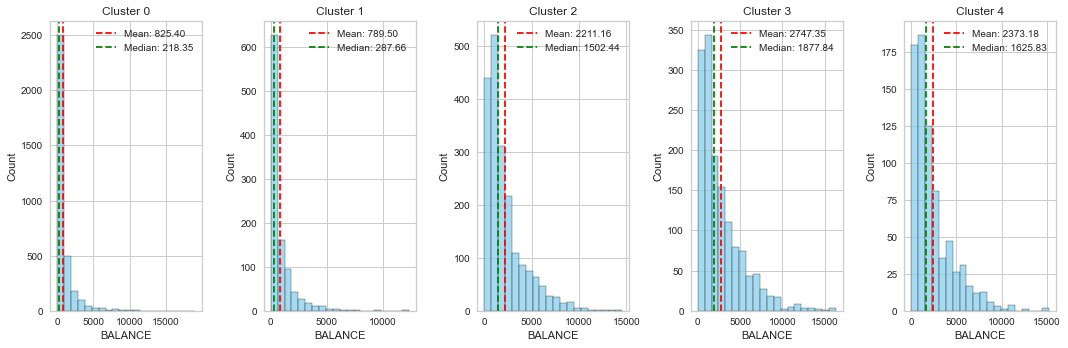

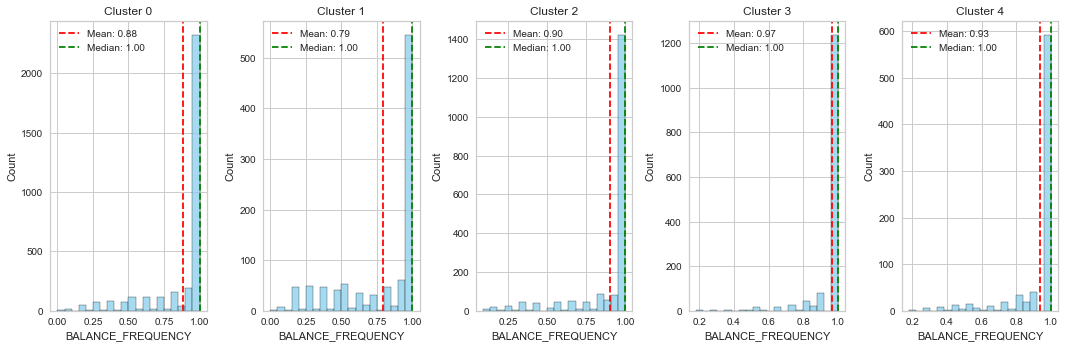

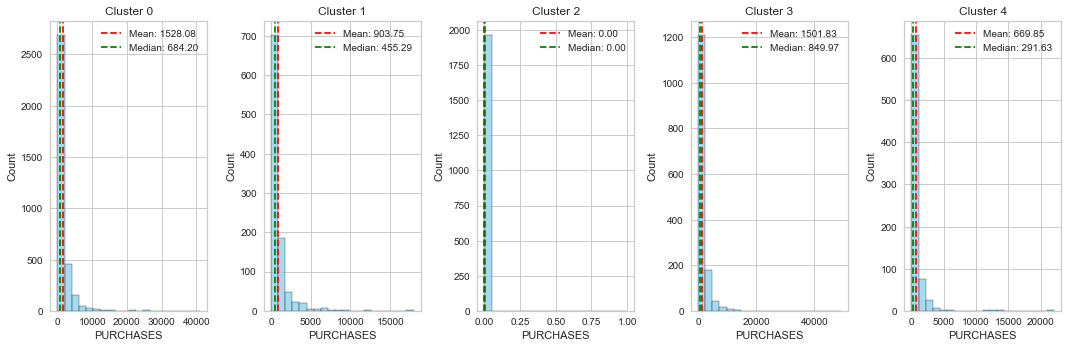

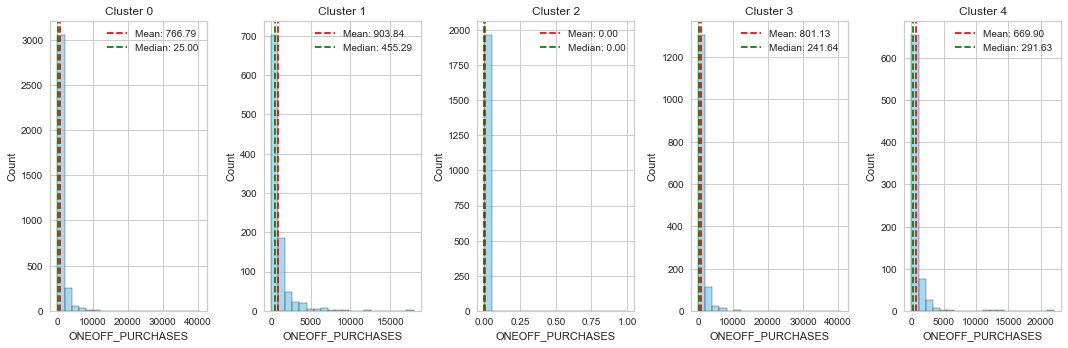

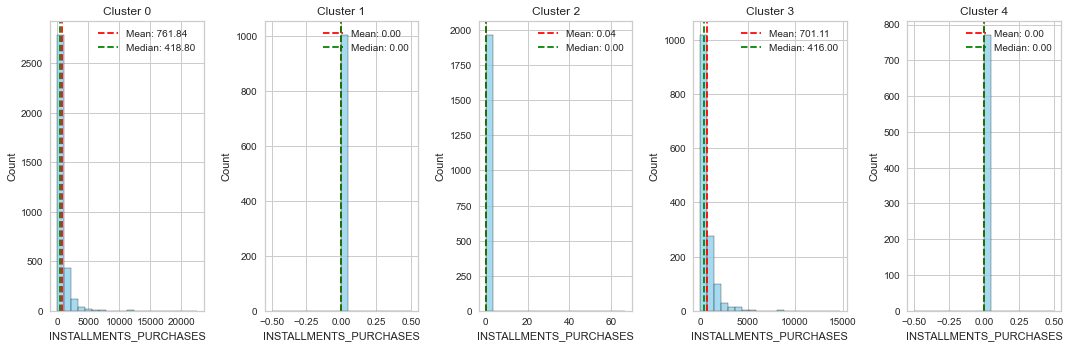

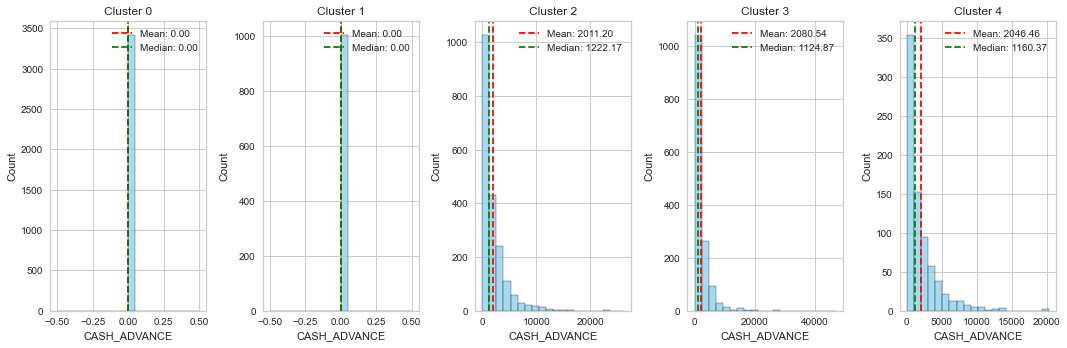

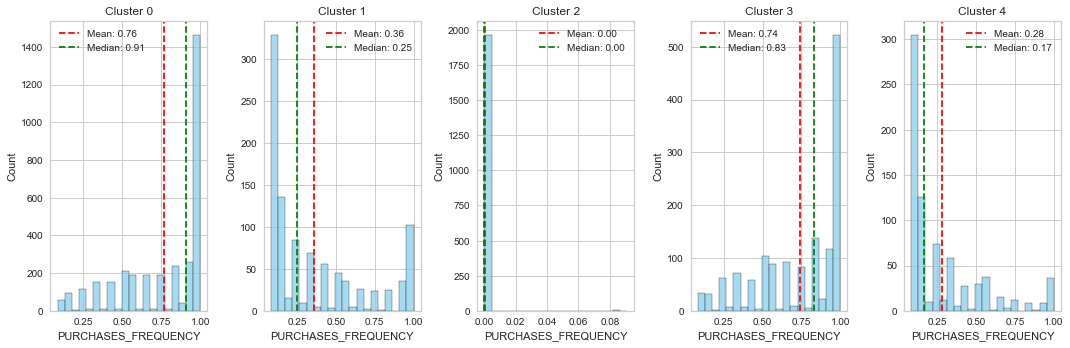

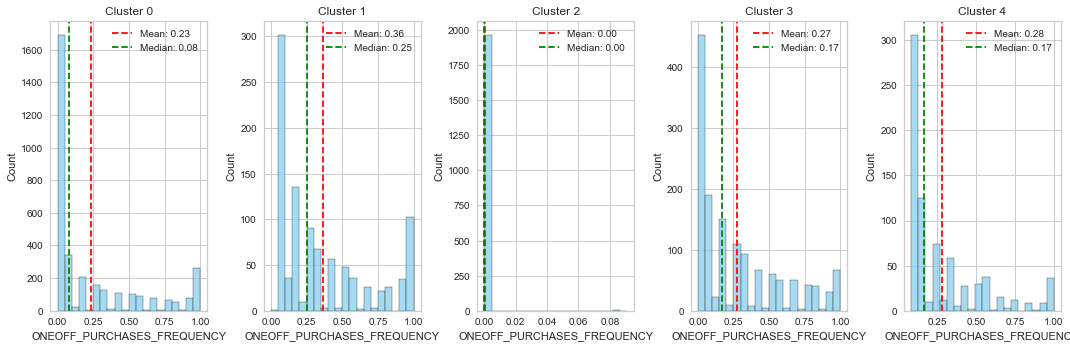

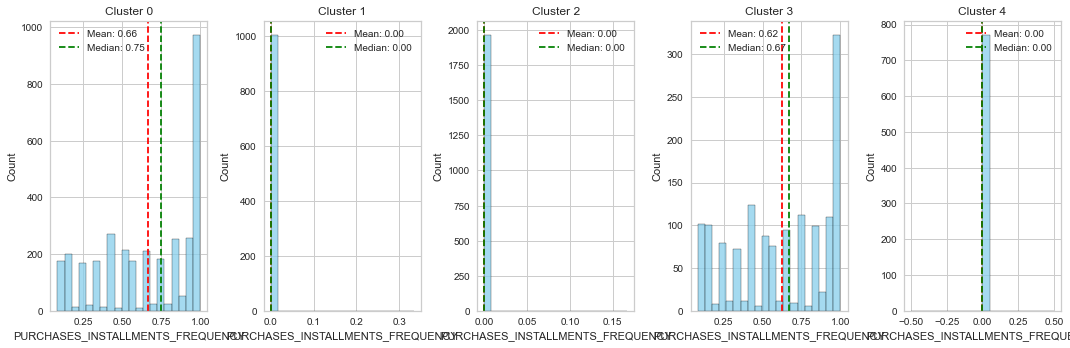

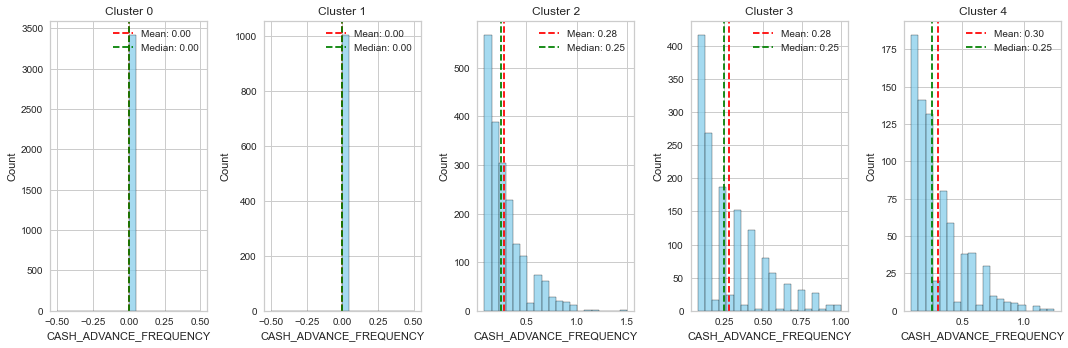

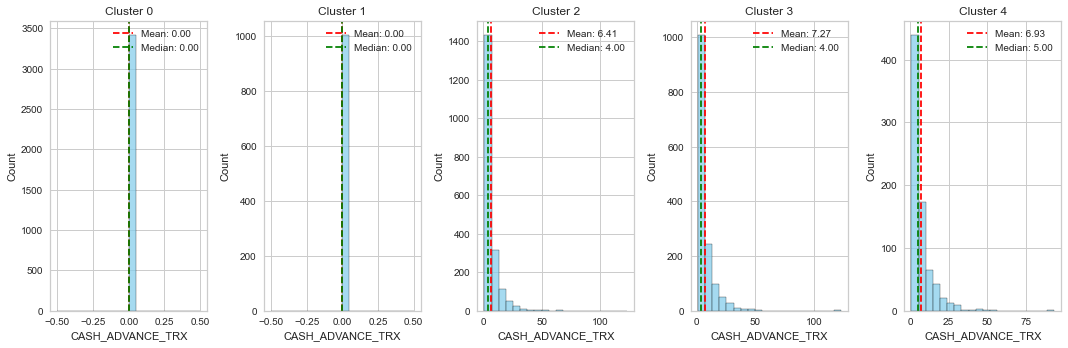

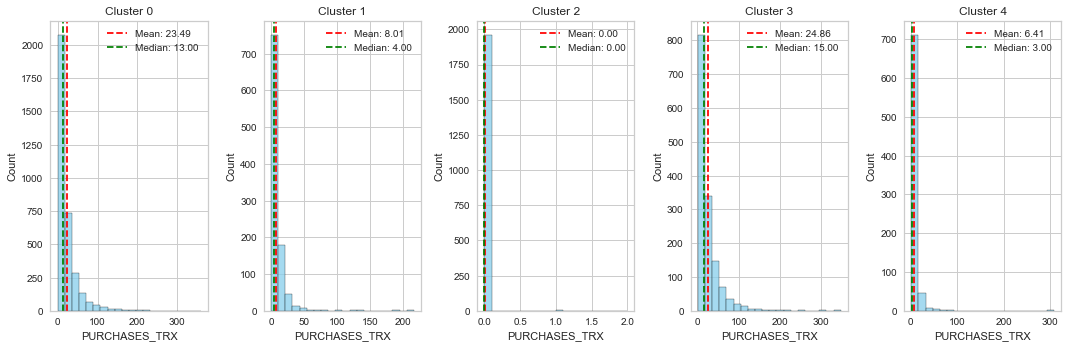

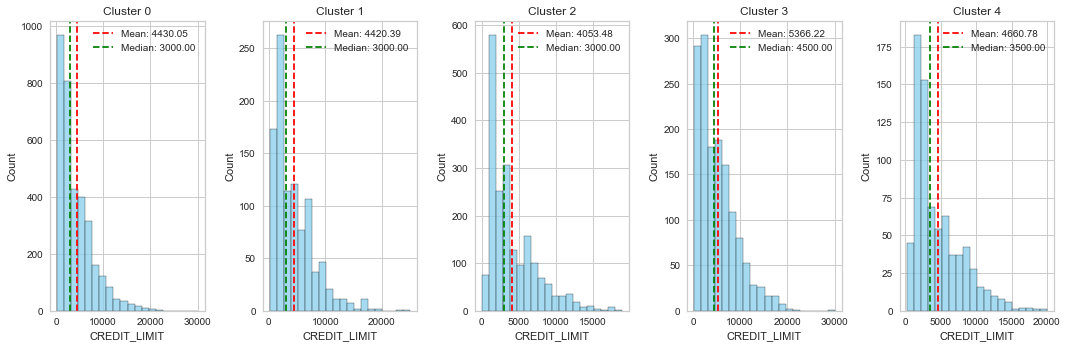

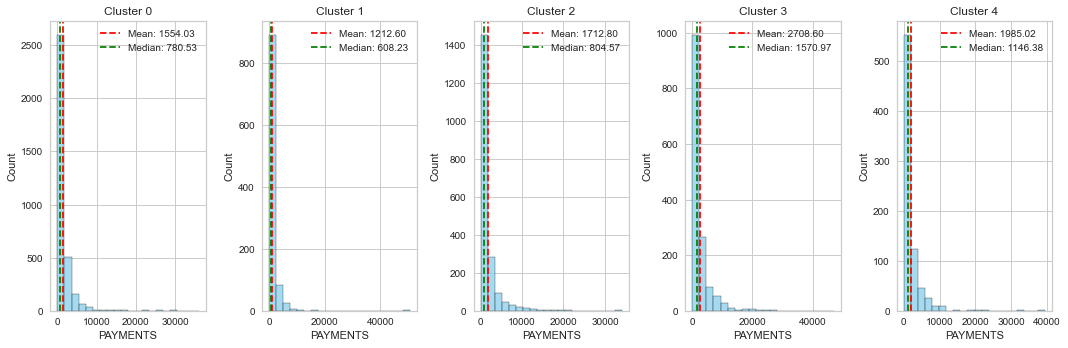

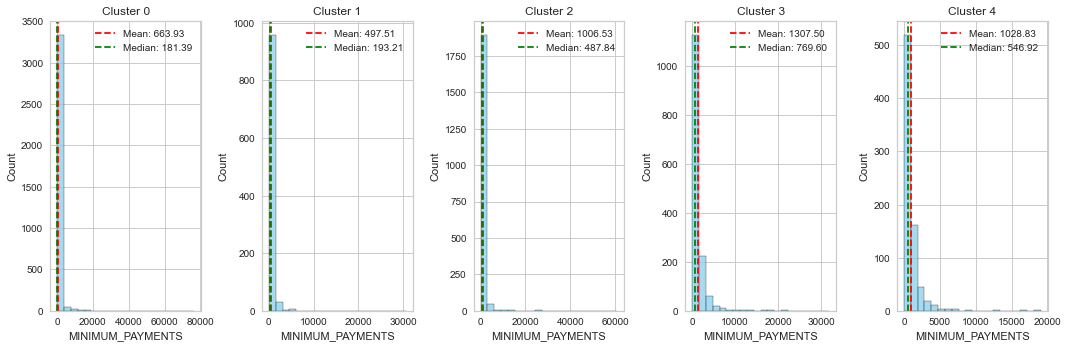

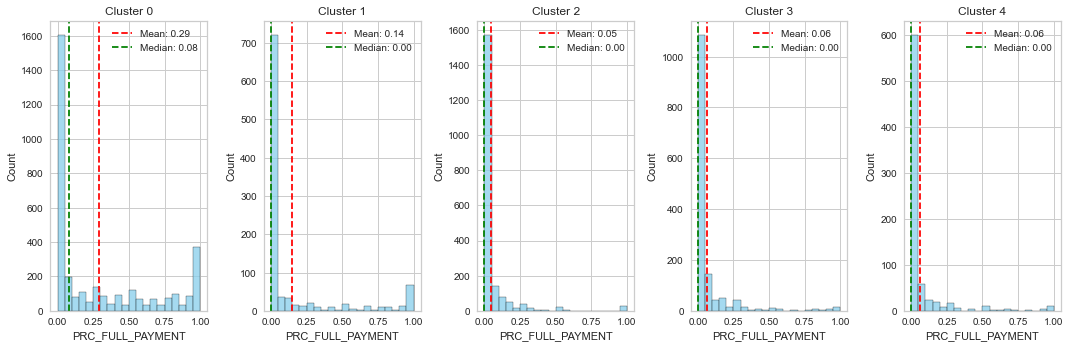

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the list of columns of interest
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Iterate over each selected column individually
for column in columns_of_interest:
    # Create a separate plot for each cluster
    plt.figure(figsize=(15, 5))
    for cluster_label in df_clustered['hi_cluster_labels'].unique():
        # Select data for the current cluster
        cluster_data = df_clustered[df_clustered['hi_cluster_labels'] == cluster_label]

        # Plot histogram for the selected column
        plt.subplot(1, len(df_clustered['hi_cluster_labels'].unique()), cluster_label + 1)
        sns.histplot(cluster_data[column], bins=20, kde=False, color='skyblue')

        # Calculate the mean and median of the data
        mean_value = cluster_data[column].mean()
        median_value = cluster_data[column].median()

        # Plot vertical lines for mean and median
        plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')

        plt.title(f'Cluster {cluster_label}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend()

    plt.tight_layout()
    plt.show()



### Cluster Analysis:

**Cluster 0:**
- **Balance:** Mean balance is $825.40, with a median of $218.35. This cluster comprises customers with moderate balances.
  
- **Purchase Behavior:** Customers in this cluster make moderate purchases, with an average purchase amount of $1528.08.
  
- **Payment Patterns:** They tend to make regular payments, with an average payment amount of $1554.03.
  
- **Credit Limit:** The average credit limit is $4430.05.

**Cluster 1:**
- **Balance:** Mean balance is $789.50, with a median of $287.66. This cluster consists of customers with relatively low balances.
  
- **Purchase Behavior:** Customers in this cluster make moderate purchases, with an average purchase amount of $903.75.
  
- **Payment Patterns:** They make regular payments, with an average payment amount of $1212.60.
  
- **Credit Limit:** The average credit limit is $4420.39.

**Cluster 2:**
- **Balance:** Mean balance is $2211.16, with a median of $1502.44. This cluster represents customers with high balances.
  
- **Purchase Behavior:** Customers in this cluster do not make purchases frequently.
  
- **Cash Advance:** They have a high average cash advance amount of $2011.20.
  
- **Cash Advance Frequency:** Customers in this cluster frequently use cash advance services.

**Cluster 3:**
- **Balance:** Mean balance is $2747.35, with a median of $1877.84. This cluster comprises customers with high balances.
  
- **Purchase Behavior:** Customers in this cluster make moderate purchases, with an average purchase amount of $1501.83.
  
- **Cash Advance:** They have a high average cash advance amount of $2080.54.
  
- **Payment Patterns:** They make regular payments, with an average payment amount of $2708.60.
  
- **Credit Limit:** The average credit limit is $5366.22.

**Cluster 4:**
- **Balance:** Mean balance is $2373.18, with a median of $1625.83. This cluster represents customers with moderate to high balances.
  
- **Purchase Behavior:** Customers in this cluster make relatively low purchases, with an average purchase amount of $669.85.
  
- **Cash Advance:** They have a high average cash advance amount of $2046.46.
  
- **Credit Limit:** The average credit limit is $4660.78.
  
## for all clusters 
- **Tenure:** Most customers in this cluster have a tenure of 12 months.

### Business Analysis:

- **Cluster 0:** This cluster represents financially stable customers with moderate balances and consistent purchasing and payment behavior.
- **Cluster 1:** Customers in this cluster have relatively low balances but make moderate purchases and payments, indicating responsible credit management.
- **Cluster 2:** This cluster consists of customers with high balances who frequently use cash advance services but do not make frequent purchases.
- **Cluster 3:** Customers in this cluster have high balances and engage in moderate purchasing activity. They also frequently use cash advance services and have high credit limits.
- **Cluster 4:** Represents customers with moderate to high balances who make low to moderate purchases and frequently use cash advance services.



## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
pca_result = pca.fit_transform(df_copy)

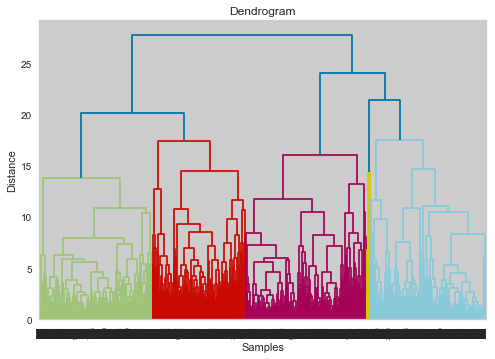

In [133]:

plt.title("Dendrogram")
mergings_c = shc.linkage(pca_result, method="complete", metric='euclidean')
shc.dendrogram(mergings_c)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

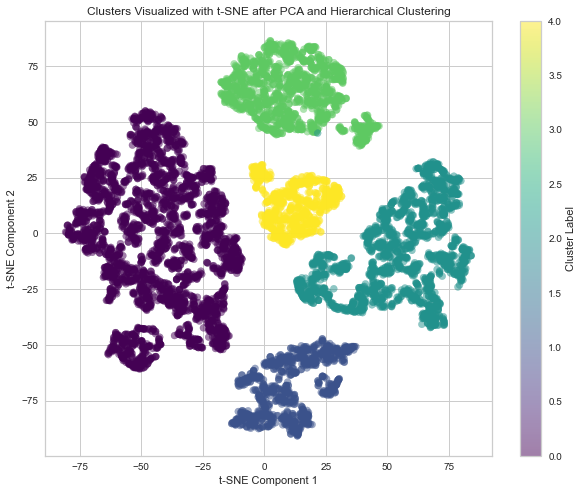

In [135]:

hierarchical_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(pca_result)

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(pca_result)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE after PCA and Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

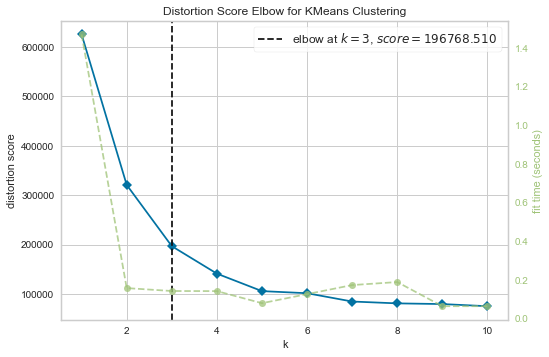

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

# Fit the visualizer to the data and visualize the elbow method plot
visualizer.fit(df_copy)
visualizer.show()